In [1]:
import pandas as pd 
import numpy as np
import seaborn as sb
from scipy import stats
import matplotlib.pyplot as plt
import math
from xgboost import XGBRegressor,XGBClassifier
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.inspection import permutation_importance
import warnings
import os as os
from itertools import product
import scipy.stats as ss
warnings.filterwarnings('ignore')

In [2]:
# Already have asteroid dataset in drive. Downloading it from drive
!gdown --id 1UnJKk78dDWyIzRjwBOr7JNb1UcD0MtKH

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1UnJKk78dDWyIzRjwBOr7JNb1UcD0MtKH
To: /content/Asteroid.csv.zip
100% 75.9M/75.9M [00:02<00:00, 34.8MB/s]


In [3]:
# Extracting the zip file
!unzip Asteroid.csv.zip

Archive:  Asteroid.csv.zip
  inflating: Asteroid.csv            


In [4]:
# Loading the csv dataset
df=pd.read_csv("Asteroid.csv")
df.head(5)

full_name         a         e     G          i          om  \
0         1 Ceres  2.769165  0.076009  0.12  10.594067   80.305532   
1        2 Pallas  2.772466  0.230337  0.11  34.836234  173.080063   
2          3 Juno  2.669150  0.256942  0.32  12.988919  169.852760   
3         4 Vesta  2.361418  0.088721  0.32   7.141771  103.810804   
4       5 Astraea  2.574249  0.191095   NaN   5.366988  141.576604   

            w         q        ad     per_y  ...    rot_per       GM     BV  \
0   73.597694  2.558684  2.979647  4.608202  ...   9.074170  62.6284  0.713   
1  310.048857  2.133865  3.411067  4.616444  ...   7.813200  14.3000  0.635   
2  248.138626  1.983332  3.354967  4.360814  ...   7.210000      NaN  0.824   
3  150.728541  2.151909  2.570926  3.628837  ...   5.342128  17.8000  0.782   
4  358.687608  2.082324  3.066174  4.130323  ...  16.806000      NaN  0.826   

      UB  IR spec_B  spec_T  neo  pha     moid  
0  0.426 NaN      C       G    N    N  1.59478  
1  0.284 NaN      B       B    N    N  1.23324  
2  0.433 NaN     Sk       S    N    N  1.03454  
3  0.492 NaN      V       V    N    N  1.13948  
4  0.411 NaN      S       S    N    N  1.09589  

[5 rows x 27 columns]

In [5]:
# Checking the dimensionality
df.shape

(839736, 27)

In [6]:
# Description about our dataset
df.describe()

a              e           G              i             om  \
count  839734.000000  839736.000000  119.000000  839736.000000  839736.000000   
mean        2.843217       0.155633    0.178739       8.950009     168.501641   
std        37.327031       0.093888    0.134603       6.666273     103.096571   
min    -32588.942986       0.000000   -0.250000       0.007546       0.000388   
25%         2.385244       0.091453    0.100000       4.069043      80.212344   
50%         2.644219       0.143654    0.190000       7.257311     160.296065   
75%         2.996035       0.199400    0.250000      12.256026     252.206645   
max      3043.149073       1.201134    0.600000     175.188725     359.999800   

                   w              q             ad          per_y  \
count  839736.000000  839736.000000  839730.000000  839735.000000   
mean      181.076593       2.404732       3.385707       6.859544   
std       104.024110       2.233138      12.746419     252.172503   
min         0.001666       0.070511       0.773684       0.000000   
25%        91.039551       1.971939       2.775342       3.683896   
50%       181.669812       2.225494       3.037745       4.299860   
75%       271.523344       2.578162       3.357958       5.185951   
max       359.999833      80.424175    6081.841956  167877.712688   

            data_arc     n_obs_used              H         albedo  \
count  823947.000000  839736.000000  837042.000000  136452.000000   
mean     5660.187025     254.617708      16.786069       0.130052   
std      4192.420393     363.004548       1.821274       0.109983   
min         0.000000       2.000000      -1.100000       0.001000   
25%      3599.000000      50.000000      15.900000       0.053000   
50%      5792.000000     118.000000      16.800000       0.078000   
75%      7228.000000     292.000000      17.600000       0.188000   
max     72684.000000    9325.000000      33.200000       1.000000   

            rot_per            GM           BV          UB    IR          moid  
count  18796.000000  1.400000e+01  1021.000000  979.000000  1.00  8.228140e+05  
mean      21.136772  7.821928e+00     0.769212    0.364396 -0.33  1.423511e+00  
std       73.131751  1.678880e+01     0.088625    0.095780   NaN  2.251048e+00  
min        0.004389  2.100000e-09     0.580000    0.120000 -0.33  3.437640e-07  
25%        4.210000  1.022225e-03     0.700000    0.289000 -0.33  9.785395e-01  
50%        6.653000  6.192500e-01     0.743000    0.360000 -0.33  1.237880e+00  
75%       12.624250  6.500000e+00     0.850000    0.439000 -0.33  1.590610e+00  
max     3240.000000  6.262840e+01     1.077000    0.655000 -0.33  7.950130e+01

## Missing values

* Here we are deleting the rows and columns that contains missing values.

* This has been done because we are provided with asteroid dataset. If we want, we can use mean, median and mode based imputation methods.

* However, these imputation methods becomes inapplicable in case of asteroids since they are non-uniform rocky objects that revolve around the sun.

* Each asteroid has their own unique features and hence we cannot fill missing values based on their non-uniformity. Deleting the missing values here is a valid and more appropriate action here.

In [7]:
# Number of missing values for each feature
df.isna().sum()

full_name              0
a                      2
e                      0
G                 839617
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15789
condition_code       993
n_obs_used             0
H                   2694
diameter          702055
extent            839718
albedo            703284
rot_per           820940
GM                839722
BV                838715
UB                838757
IR                839735
spec_B            838070
spec_T            838756
neo                    6
pha                16922
moid               16922
dtype: int64

In [8]:
# Checking percentage of missing values
missing = df.isna().sum() * 100 / len(df)
missing_values = pd.DataFrame({'column': df.columns,'percent_missing': missing})
missing_values

column  percent_missing
full_name            full_name         0.000000
a                            a         0.000238
e                            e         0.000000
G                            G        99.985829
i                            i         0.000000
om                          om         0.000000
w                            w         0.000000
q                            q         0.000000
ad                          ad         0.000715
per_y                    per_y         0.000119
data_arc              data_arc         1.880234
condition_code  condition_code         0.118251
n_obs_used          n_obs_used         0.000000
H                            H         0.320815
diameter              diameter        83.604252
extent                  extent        99.997856
albedo                  albedo        83.750607
rot_per                rot_per        97.761677
GM                          GM        99.998333
BV                          BV        99.878414
UB                          UB        99.883416
IR                          IR        99.999881
spec_B                  spec_B        99.801604
spec_T                  spec_T        99.883297
neo                        neo         0.000715
pha                        pha         2.015157
moid                      moid         2.015157

### Deleting columns that has above 90% missing values

In [9]:
# Deleting columns who have more than 90% missing values
df.drop(columns = ['G','extent','rot_per','GM','BV','UB','IR','spec_B','spec_T'] , axis=1, inplace = True)
df.shape

(839736, 18)

In [10]:
df.columns

Index(['full_name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc',
       'condition_code', 'n_obs_used', 'H', 'diameter', 'albedo', 'neo', 'pha',
       'moid'],
      dtype='object')

### Imputing missing values

#### Median based Imputation on the columns that has lower number of missing values

In [11]:
df['a'].replace([np.nan], df['a'].median(), inplace=True)
df['ad'].replace([np.nan], df['ad'].median(), inplace=True)
df['per_y'].replace([np.nan], df['per_y'].median(), inplace=True)

#### Using Random Forest Regression Model for features that have reasonable atmost 10-20% missing values.

**condition_code**

In [12]:
df['condition_code'].value_counts()

0      540387
0       94331
9       24143
1       22220
5       19893
6       17238
7       15686
8       15596
4       15301
2       14734
1       10561
3        9625
9.0      7236
6.0      5805
2        5555
5        5335
7.0      4944
8.0      4349
3        3140
4        2491
E         172
D           1
Name: condition_code, dtype: int64

In [13]:
a=df[df['condition_code']=='D']

In [14]:
a=df[df['data_arc']==42]
a['condition_code'].value_counts()

5      227
6      134
6.0     78
5.0     57
7       29
4       14
7.0     12
9        3
8        2
9.0      1
8.0      1
D        1
E        1
Name: condition_code, dtype: int64

In [15]:
a=df[df['condition_code']=='E']

In [16]:
a=df[df['data_arc']<30]
a['condition_code'].value_counts()

9      23663
8      15224
7      13459
9.0     7050
6       6915
8.0     4168
7.0     4064
6.0     2151
5       1480
5.0      203
E        156
4         99
3         61
2         16
3.0       13
4.0       12
2.0        1
Name: condition_code, dtype: int64

In [17]:
df['condition_code'].replace('E', 9, inplace=True)
df['condition_code'].replace('D', 5, inplace=True)
df['condition_code'].value_counts()

0      540387
0       94331
9       24143
1       22220
5       19893
6       17238
7       15686
8       15596
4       15301
2       14734
1       10561
3        9625
9        7408
6.0      5805
2        5555
5        5336
7.0      4944
8.0      4349
3        3140
4        2491
Name: condition_code, dtype: int64

In [18]:
df['condition_code'].replace([np.nan], 0, inplace=True)

In [19]:
df.head(5)

full_name         a         e          i          om           w  \
0         1 Ceres  2.769165  0.076009  10.594067   80.305532   73.597694   
1        2 Pallas  2.772466  0.230337  34.836234  173.080063  310.048857   
2          3 Juno  2.669150  0.256942  12.988919  169.852760  248.138626   
3         4 Vesta  2.361418  0.088721   7.141771  103.810804  150.728541   
4       5 Astraea  2.574249  0.191095   5.366988  141.576604  358.687608   

          q        ad     per_y  data_arc condition_code  n_obs_used     H  \
0  2.558684  2.979647  4.608202    8822.0              0        1002  3.34   
1  2.133865  3.411067  4.616444   72318.0              0        8490  4.13   
2  1.983332  3.354967  4.360814   72684.0              0        7104  5.33   
3  2.151909  2.570926  3.628837   24288.0              0        9325  3.20   
4  2.082324  3.066174  4.130323   63431.0              0        2861  6.85   

  diameter  albedo neo pha     moid  
0    939.4  0.0900   N   N  1.59478  
1      545  0.1010   N   N  1.23324  
2  246.596  0.2140   N   N  1.03454  
3    525.4  0.4228   N   N  1.13948  
4  106.699  0.2740   N   N  1.09589

In [20]:
df['condition_code'].isna().sum()

0

**data_arc**

**Source :** https://en.wikipedia.org/wiki/Observation_arc

* In observational astronomy, the observation arc or arc length aka data_arc of a Solar System body is the time period between its earliest and latest observations, used for tracing the body's path. 
* It is usually given in days or years(In this dataset, it is given in the span of days). 
* The term is mostly used in the discovery and tracking of asteroids and comets. Arc length has the greatest influence on the accuracy of an orbit. 
* The number and spacing of intermediate observations has a lesser effect.
* It has a direct relationship with orbit conditional code. 
* If the value of condition code is higher, Then the Asteroids have lower data_arc.
* We will number of observations and condition_code features for missing value imputation for data_arc. 
* Keep in mind that these two are the most important features in determining arc length of an Asteroid. 

In [21]:
corr_matrix = df.corr()

In [22]:
corr_matrix["data_arc"].abs().sort_values(ascending=False)

data_arc      1.000000
n_obs_used    0.729338
H             0.549388
albedo        0.254054
e             0.148877
i             0.140402
moid          0.031126
q             0.028158
ad            0.021359
per_y         0.008633
w             0.005452
a             0.002685
om            0.002043
Name: data_arc, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split
data = df[["n_obs_used","condition_code",'data_arc']]

test_data = data[data["data_arc"].isna()]
data.dropna(inplace=True)

y_train = data["data_arc"]
X_train = data.drop("data_arc", axis=1)
X_test = test_data.drop("data_arc", axis=1)
x_train, x_cv, y_train, y_cv = train_test_split(X_train,y_train,test_size = 0.20)

model = RandomForestRegressor(n_estimators=500)
model.fit(x_train, y_train)

y_pred = model.predict(X_test)

In [24]:
print("R^2 of the train model is : ",model.score(x_train,y_train))

R^2 of the train model is :  0.7367598822592912


In [25]:
# Shape is equal to number of missing values that are present in the feature
y_pred.shape

(15789,)

In [26]:
df.loc[df['data_arc'].isna(),'data_arc']=y_pred
df['data_arc'].isna().sum()

0

In [27]:
# Checking if there any negative data_arc(This should always be positive)
a=df[df['data_arc']<0]
print(a)

Empty DataFrame
Columns: [full_name, a, e, i, om, w, q, ad, per_y, data_arc, condition_code, n_obs_used, H, diameter, albedo, neo, pha, moid]
Index: []


As you can observe here, higher the orbit condtion code, lower is the arc length value.

**absolute magnitude(H)**

In [28]:
corr_matrix=df.corr()

In [29]:
corr_matrix["H"].abs().sort_values(ascending=False)

H             1.000000
n_obs_used    0.572090
data_arc      0.549358
q             0.436475
moid          0.432228
e             0.342208
albedo        0.242063
ad            0.124785
i             0.098137
per_y         0.044020
a             0.031172
w             0.004317
om            0.002209
Name: H, dtype: float64

In [30]:
data = df[['q',"data_arc",'H',"n_obs_used"]]


test_data = data[data["H"].isna()]
data.dropna(inplace=True)

y_train = data["H"]
X_train = data.drop("H", axis=1)
X_test = test_data.drop("H", axis=1)
x_train, x_cv, y_train, y_cv = train_test_split(X_train,y_train,test_size = 0.25,train_size =0.75)

model = XGBRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(X_test)

[17:44:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [31]:
print("R^2 of the train model is : ",model.score(x_train,y_train))

R^2 of the train model is :  0.9019933209492046


In [32]:
y_pred.shape

(2694,)

In [33]:
df.loc[df['H'].isna(),'H']=y_pred
df['H'].isna().sum()

0

In [34]:
# Checking if the values are lying in proper range(Minimum is -1.1)
b=df[df['H']<0]
b.head()

full_name          a         e          i  \
134339                134340 Pluto  39.445070  0.250249  17.089001   
136198    136199 Eris (2003 UB313)  67.740981  0.438839  44.144457   
136471  136472 Makemake (2005 FY9)  45.561190  0.158029  28.980304   

                om           w          q         ad       per_y  data_arc  \
134339  110.376958  112.597142  29.573992  49.316148  247.740662   33102.0   
136198   35.904514  151.687105  38.013606  97.468356  557.552061   23530.0   
136471   79.645993  295.091928  38.361211  52.761168  307.539415   23479.0   

       condition_code  n_obs_used     H diameter  albedo neo pha     moid  
134339              0        4379 -0.76      NaN     NaN   N   N  28.6031  
136198            3.0        1228 -1.10      NaN     NaN   N   N  37.0687  
136471            2.0        1949 -0.20      NaN     NaN   N   N  37.4657

**moid**

In [35]:
corr_matrix=df.corr()

In [36]:
corr_matrix["moid"].abs().sort_values(ascending=False)

moid          1.000000
q             0.999742
H             0.432301
ad            0.307611
albedo        0.267158
per_y         0.110203
e             0.105048
a             0.080132
i             0.040934
n_obs_used    0.031179
data_arc      0.030869
om            0.011064
w             0.003379
Name: moid, dtype: float64

#### Checking Multicollinearity before building Linear Regression Model

* We are using VIF(Variance Inflation Factor).
*  VIF determines the strength of the correlation between the independent variables. 
* It is predicted by taking a variable and regressing it against every other variable.
* VIF starts at 1 and has no upper limit
* VIF = 1, no correlation between the independent variable and the other variables.
* VIF between 1 to 5 indicates lesser multcollinearity independent variable and the other variables.
* VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others 

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [38]:
x=df[["ad","H","q"]]
print(calc_vif(x))

  variables       VIF
0        ad  1.181857
1         H  1.945945
2         q  2.160583


* All the features have VIF < 5. So, we can build train model and compute missing values 

In [39]:
from sklearn.linear_model import LinearRegression
data = df[["ad","H","q","moid"]]

test_data = data[data["moid"].isna()]
data.dropna(inplace=True)

y_train = data["moid"]
X_train = data.drop("moid", axis=1)
X_test = test_data.drop("moid", axis=1)
x_train, x_cv, y_train, y_cv = train_test_split(X_train,y_train,test_size = 0.25,train_size =0.75)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(X_test)

In [40]:
print("R^2 of the train model is : ",model.score(x_train,y_train))

R^2 of the train model is :  0.9995095998183641


In [41]:
y_pred.shape

(16922,)

In [42]:
df.loc[df['moid'].isna(),'moid']=y_pred
df['moid'].isna().sum()

0

In [43]:
d=df[df['moid']<0]
print(d)

Empty DataFrame
Columns: [full_name, a, e, i, om, w, q, ad, per_y, data_arc, condition_code, n_obs_used, H, diameter, albedo, neo, pha, moid]
Index: []


**albedo**

Using Median Based Imputation for albedo

In [44]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median', missing_values=np.nan)
imputer = imputer.fit(df[['albedo']])
df['albedo'] = imputer.transform(df[['albedo']])

In [45]:
df['albedo'].isna().sum()

0

**diameter**

In [46]:
# Converting diameter dtype to float
df = df.astype({'diameter' : float})

#### For categorical Features

#### NEO :

* If the perihelion distance is less than a or equal to 1.3 au, Fill the column with 'Y' else 'N'

In [47]:
neo_nan=df.loc[df['neo'].isna(),['neo','q']]
pred=np.where(neo_nan['q']<=1.3, 'Y','N')

In [48]:
len(pred)

6

In [49]:
df.loc[df['neo'].isna(),'neo']=pred

In [50]:
df['neo'].value_counts(dropna=False)

N    818346
Y     21390
Name: neo, dtype: int64

#### PHA:

If moid<= 0.05 and H<=22, then 'Y' else 'N'

In [51]:
pha_nan=df.loc[df['pha'].isna(),['pha','moid','H']]
pred=np.where((pha_nan['moid']<=0.05) & (pha_nan['H']<=22), 'Y','N')

In [52]:
len(pred)

16922

In [53]:
df.loc[df['pha'].isna(),'pha']=pred

In [54]:
df['pha'].value_counts(dropna=False)

N    837722
Y      2014
Name: pha, dtype: int64

**We have successfully handled all of our missing values here**

In [55]:
df=df.astype({'diameter':float})

## Univariate analysis

### Numerical Features

#### Semi-Major axis(a)

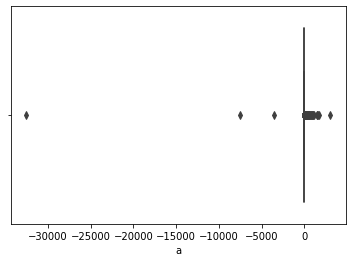

In [ ]:
# box plot
sb.boxplot(x = 'a',data = df)

In [ ]:
df['a'].describe()

count    839736.000000
mean          2.843216
std          37.326987
min      -32588.942986
25%           2.385245
50%           2.644219
75%           2.996034
max        3043.149073
Name: a, dtype: float64

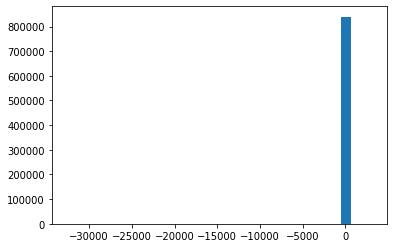

In [ ]:
plt.hist(df['a'],bins=int(300/10))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


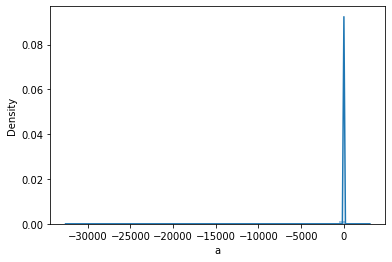

In [ ]:
# Distribution
sb.distplot(df['a'])

In [ ]:
# Number of asteroids that follow hyperbolic semi-major axis
df[df['a']<0].shape[0]

4

#### Inference:

* In geometry, the major axis of an ellipse is its longest diameter: a line segment that runs through the center and both foci, with ends at the two most widely separated points of the perimeter. The semi-major axis (major semiaxis) is the longest semidiameter or one half of the major axis, and thus runs from the centre, through a focus, and to the perimeter. The value is positive if the orbit is elliptical, and negative if the orbit is hyperbolic


*   Highly negative skewed distribution because of negative values present inside this feature. It means that there are some asteroids whose semi-major orbit are hyperbolic.

*   Average semi major axis observed is 2.843216au.




*   It has a deviation of 37.326987au.




*   Minimum semi-major axis value observed is -32588.942986au. Too much hyperbolic orbit




*   25% values lie around 2.385245au.





*   Median observed is 2.644219au.






*   75% Asteroid has semi-major axis values are below 2.996034au. Remaining 25% Asteroids will have value above 2.996au. 




*   Maximum observed semi-major axis is 3043.149073



*   Almost 100% of the asteroids follow elliptical orbits. 4 asteroids follow hyperbolic orbits since their semi-major axis are negative. It cannot be considered outlier since it plays an important role in determining the orbit




#### Perhilion distance(q) 

In [ ]:
df['q'].describe()

count    839736.000000
mean          2.404732
std           2.233138
min           0.070511
25%           1.971939
50%           2.225494
75%           2.578162
max          80.424175
Name: q, dtype: float64

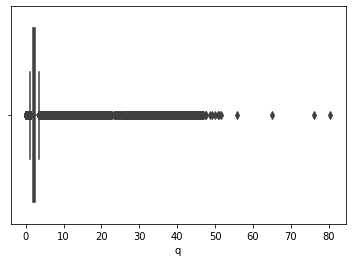

In [ ]:
# box plot
sb.boxplot(x = 'q',data = df)

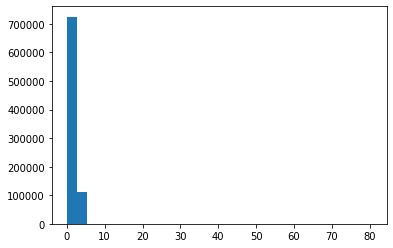

In [ ]:
plt.hist(df['q'],bins=int(300/10))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


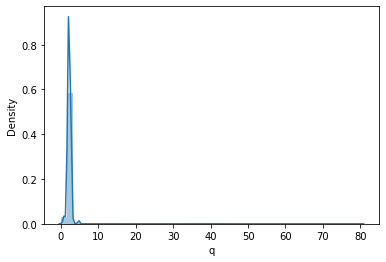

In [ ]:
# Distribution
sb.distplot(df['q'])

#### Inference:


*   The orientation of an elliptical orbit can be specified by three orbital elements: **the inclination, the ascending node** and the **argument of perihelion**. Suppose we have an elliptical orbit with eccentricity, e and semi-major axis, a. The perihelion distance is the closest distance between the orbiting body (e.g. a planet) and the focus (e.g. the Earth lies at one focus of a planetary orbit, Moon focus is empty).


* The distribution is positively skewed. Since it contains all the values based on distance. Since distance is a magnitude.


* Mean observed perihelion distance is 2.404732au.




* Minimum perihelion distance observed is 0.070511au.



* 25% of asteroids have perihelion distance of 1.971939au


* Median perihelion distance for all asteroids is 2.225494au.



* 75% asteroids have perihelion distance values above 2.578162.




* Maximum observed perihelion distance is 80.424175.


**data_arc**

In [ ]:
df['data_arc'].describe()

count    839736.000000
mean       5627.279823
std        4159.690048
min           0.000000
25%        3638.501567
50%        5735.000000
75%        7197.000000
max       72684.000000
Name: data_arc, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


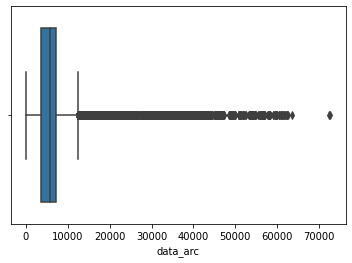

In [ ]:
sb.boxplot("data_arc",data=df)

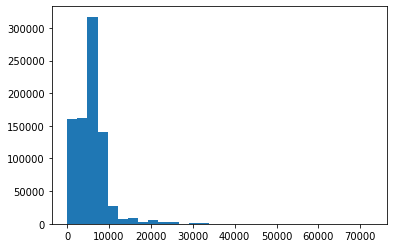

In [ ]:
plt.hist(df['data_arc'],bins=int(300/10))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


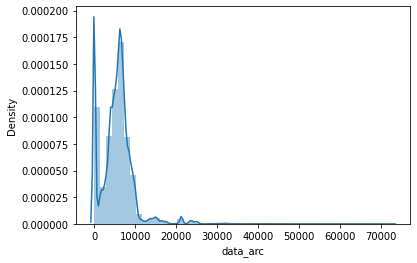

In [ ]:
# Distribution
sb.distplot(df['data_arc'])

#### Inference:


* Mean observed value is 5660.328000
* The values deviate 4152.821663 from the mean
* Minimum observed value is 0.000000
* 25% values lie around 3647.000000
* Median 5736.000000
* 75% values 7197.000000
* Maximum value observed 72684.000000



In [ ]:
df[df['diameter']>900]

full_name         a         e          i         om          w  \
0       1 Ceres  2.769165  0.076009  10.594067  80.305532  73.597694   

          q        ad     per_y  data_arc  condition_code  n_obs_used     H  \
0  2.558684  2.979647  4.608202    8822.0               0        1002  3.34   

   diameter  albedo neo pha     moid  
0     939.4    0.09   N   N  1.59478

#### eccentricity(e)

In [ ]:
df['e'].describe()

count    839736.000000
mean          0.155633
std           0.093888
min           0.000000
25%           0.091453
50%           0.143654
75%           0.199400
max           1.201134
Name: e, dtype: float64

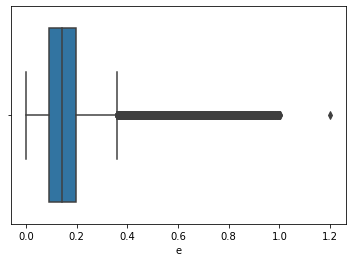

In [ ]:
sb.boxplot(x = 'e',data = df)

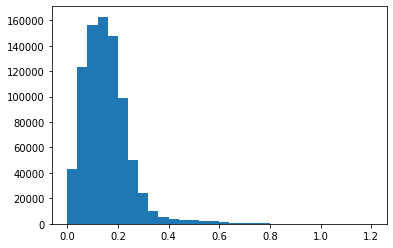

In [ ]:
plt.hist(df['e'],bins=int(300/10))
plt.show()

In [ ]:
df['e'].value_counts()

0.000000    8
0.180161    2
0.111770    2
0.303771    2
0.102074    2
           ..
0.160047    1
0.178492    1
0.303747    1
0.103685    1
0.287672    1
Name: e, Length: 839664, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


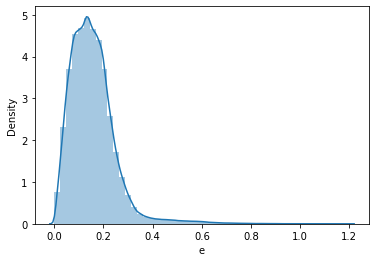

In [ ]:
# Distribution
sb.distplot(df['e'])

In [ ]:
a=df[df['e']==0]
a.shape[0]

8

In [ ]:
c=df[df['e']==1]
# We are excluding 0 here for elliptical orbit
print(c.shape[0])

2


In [ ]:
d=df[df['e']>1]
print(d.shape[0])

4


#### Inference:
* The orbital eccentricity of an astronomical object is a dimensionless parameter that determines the amount by which its orbit around another body deviates from a perfect circle. A value of 0 is a circular orbit, values between 0 and 1 form an elliptic orbit, 1 is a parabolic escape orbit (or capture orbit), and greater than 1 is a hyperbola.

* Average eccentricity value is 0.155633 units.
* Minimum eccentricity observed is 0 units. The asteroid follows circular orbit.
* 25% Asteroids have eccentricity value of around 0.091453
* Median Asteroid eccentricty is 0.143654
* 75% Asteroids have eccentricity value below 0.199400. Remaining 25% will have values above 0.1994. 
* Maximum eccentricity observed is 1.201134. A hyperbolic orbit.
* Almost all asteroids follow elliptical orbit beacause of eccentricity lying between 0 to 1. 8 asteroids follow circular orbit, 2 asteroids follow parabolic orbit and 4 asteroids follow hyperbolic orbit. 

#### inclination

In [ ]:
df['i'].describe()

count    839736.000000
mean          8.950009
std           6.666273
min           0.007546
25%           4.069043
50%           7.257311
75%          12.256026
max         175.188725
Name: i, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


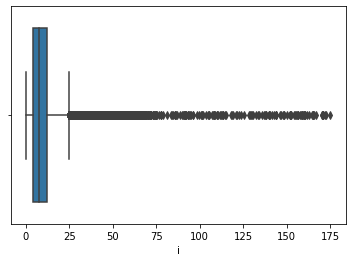

In [ ]:
# Distribution
sb.boxplot(df['i'])

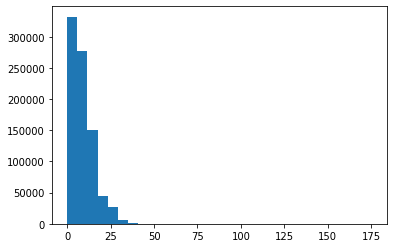

In [ ]:
# Histograms
plt.hist(df['i'],bins=int(300/10))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


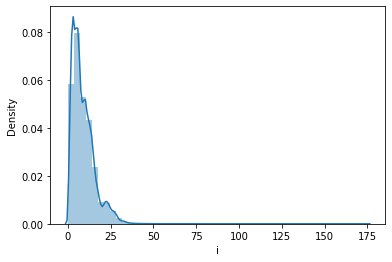

In [ ]:
# Distribution
sb.distplot(df['i'])

#### Inference:
* Inclination measures the tilt of an object's orbit around a celestial body. It is expressed as the angle between a reference plane and the orbital plane or axis of direction of the orbiting object(in degrees).

* The inclination of orbits of natural or artificial satellites is measured relative to the equatorial plane of the body they orbit, if they orbit sufficiently closely. The equatorial plane is the plane perpendicular to the axis of rotation of the central body.

* An inclination of 30° could also be described using an angle of 150°. The convention is that the normal orbit is prograde, an orbit in the same direction as the planet rotates. Inclinations greater than 90° describe retrograde orbits (backward). Thus:

An inclination of 0° means the orbiting body has a prograde orbit in the planet's equatorial plane.

> * An inclination greater than 0° and less than 90° also describes a prograde orbit.



> * An inclination of 63.4° is often called a critical inclination, when describing artificial satellites orbiting the Earth, because they have zero apogee drift.



> * An inclination of exactly 90° is a polar orbit, in such orbits, the spacecraft passes over the poles of the planet.


> * An inclination greater than 90° and less than 180° is a retrograde orbit.



> * An inclination of exactly 180° is a retrograde equatorial orbit.


keywords:- 
1. **Retrograde** : 
* Retrograde motion in astronomy is, in general, orbital or rotational motion of an object in the direction opposite the rotation of its primary, that is, the central object (refer to the figure below). 
* It may also describe other motions such as precession or nutation of an object's rotational axis.
* Asteroids orbits in the direction opposite to the rotation of its central object(Sun).
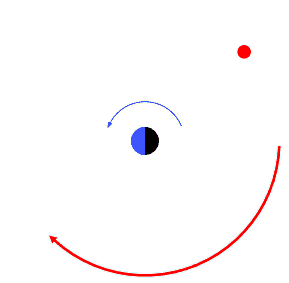

Look at the figure above, the above figure shows that a Satellite(the one in red
) orbits in the direction opposite to the rotation of its central object(blue/black).
2. **pograde** : 
* Prograde motion in astronomy is, in general, orbital or rotational motion of an object in the direction along the rotation of its primary, that is, the central object.
* Asteroids orbits in the direction opposite to the rotation of its central object(Sun).

In [ ]:
df[df['i']==0].shape[0]

0

In [ ]:
df[df['i']<90].shape[0]

839621

In [ ]:
df[df['i']==63.4].shape[0]

0

In [ ]:
df[df['i']==90].shape[0]

0

In [ ]:
df[df['i']<180].shape[0]
df[df['i']<180].shape[0]-df[df['i']<90].shape[0]

115

#### Observation:
* Mean inclination observed is 8.950009°
* Minimum observed value of inclination is 0.007546°. A pograde orbit.
* 25% Asteroids have inclination value fall under 4.069043°
* Median inclination is 7.257311°
* 75% Asteroids have inclination value of below 12.256026°. Remaining 25% objects will have inclination value above the mentioned value i.e. 12.25° 
* Max Inclination value observed is 175.188725°
* Almost all asteroids follow pograde orbit. However, there are still 115 asteroids who follow retrograde orbit.

#### ascending node(om)

In [ ]:
df['om'].describe()

count    839736.000000
mean        168.501641
std         103.096571
min           0.000388
25%          80.212344
50%         160.296065
75%         252.206645
max         359.999800
Name: om, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


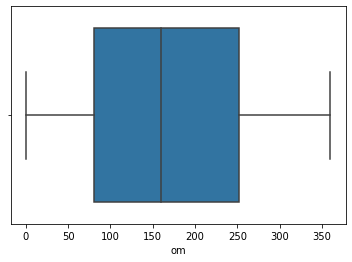

In [ ]:
# Distribution
sb.boxplot(df['om'])

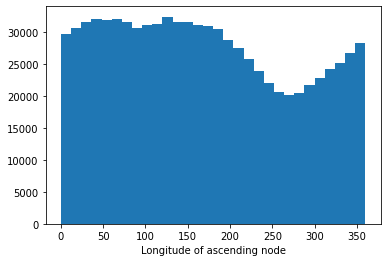

In [ ]:
plt.hist(df['om'],bins=int(300/10))
plt.xlabel('Longitude of ascending node')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


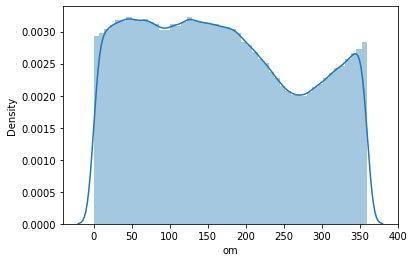

In [ ]:
# Distribution
sb.distplot(df['om'])

#### Inference
* The Longitude of the Ascending Node of an object's orbit is the angle between the orbit's ascending node (the point where the object crosses from below some reference plane to above the reference plane) and a reference direction. In Universe Sandbox, the reference plane is the x-z plane of the Simulation Grid, and the reference direction is the negative x-axis.

* For an object orbiting in the reference plane (with an Inclination of zero), the Longitude of the Ascending Node will be undefined and the property will be read-only.

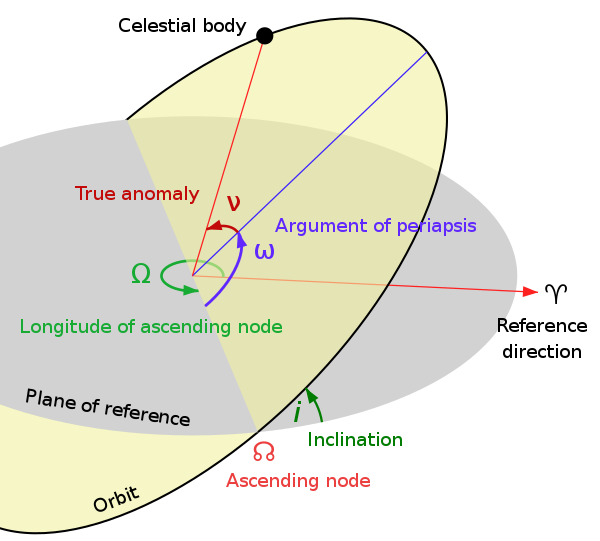

* Commonly used reference planes and origins of longitude include:

> * For geocentric orbits, Earth's equatorial plane as the reference plane, and the First Point of Aries as the origin of longitude. In this case, the longitude is also called the right ascension of the ascending node (RAAN). The angle is measured eastwards (or, as seen from the north, counterclockwise) from the First Point of Aries to the node. An alternative is the local time of the ascending node (LTAN), based on the local mean time at which the spacecraft crosses the equator. Similar definitions exist for satellites around other planets (see planetary coordinate systems).

> * For heliocentric orbits, the ecliptic as the reference plane, and the First Point of Aries as the origin of longitude. The angle is measured counterclockwise (as seen from north of the ecliptic) from the First Point of Aries to the node.

> * For orbits outside the Solar System, the plane tangent to the celestial sphere at the point of interest (called the plane of the sky) as the reference plane, and north (i.e. the perpendicular projection of the direction from the observer to the North Celestial Pole onto the plane of the sky) as the origin of longitude. The angle is measured eastwards (or, as seen by the observer, counterclockwise) from north to the node.


Keywords:

1. **geocentric** : Earth as a central object. Revolving around Earth's orbit
2. **heliocentric** : Sun as a central object. Revovlving around Sun's orbit.

#### Observations :
* The value of this feature lie between 0 to 360 degrees.




* Mean observed value is 168.501641 degrees.




* Minimum value observed is 0.000388 degrees.




* 25% Asteroids have longitude of ascending node value under 80.212344 degrees.




* Median value is 160.296065 degrees.




* 75% Asteroids have longitude of ascending node value under 252.206645 degrees. Remaining 25% asteroids have this value above 252.206645 degrees




* Maximum value observed is 359.999800 degrees. Almost 360 degrees. Closer to its maximum value.


#### argument of perhelion(w)

In [ ]:
df['w'].describe()

count    839736.000000
mean        181.076593
std         104.024110
min           0.001666
25%          91.039551
50%         181.669812
75%         271.523344
max         359.999833
Name: w, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


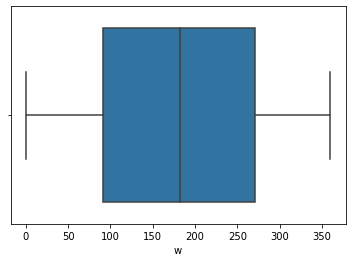

In [ ]:
# Distribution
sb.boxplot(df['w'])

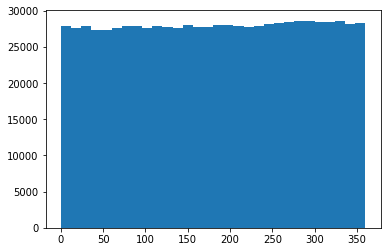

In [ ]:
# Distribution
plt.hist(df['w'],bins=int(300/10))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


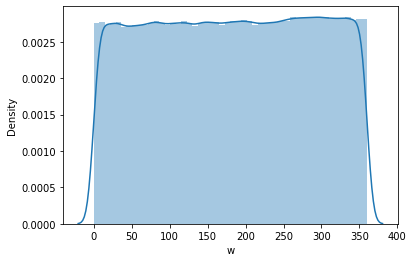

In [ ]:
# Distribution
sb.distplot(df['w'])

#### Inference :

* In astronomy, the argument of periapsis (ω) is a way of talking about the orbit of a planet, asteroid or comet around the sun. It is also known as the argument of perihelion or the argument of perifocus. It is the angle (starting from the center of the orbit) between an orbiting body's periapsis and its ascending node. Periapsis is the point when the orbiting object comes the closest to the thing it is orbiting around; for example, the moon is at periapsis when it is closest to the Earth. The ascending node is one of two places where an orbiting object passes through the reference plane, an imaginary flat surface which runs through the object being orbited around. The size of the angle depends on which way the object is orbiting.

* The angle is measured in the orbital plane and in the direction of motion. For specific types of orbits, words such as "perihelion" (for Sun-centered orbits), "perigee" (for Earth-centered orbits), "pericenter" (general), etc. may replace the word "periapsis".

* The observation for all asteroids here are taken w.r.t heliocentric orbits.

* The value always lie between 0 to 360 degrees.

* An argument of periapsis of 0° means that the orbiting body will be at its closest approach to the central body at the same moment that it crosses the plane of reference from south to north. 

* An argument of periapsis of 90° means that the orbiting body will reach periapsis at its northmost distance from the plane of reference.

#### Observations :

* Mean Argument value is 181.076593 degrees.
* Minimum Argument value observed is 0.001666 degrees.
* 25% Asteroid have Argument value of below 91.039551 degrees.
* Median Argument value is 181.669812.
* 75% Asteroids have Argument value of below 271.523344 degrees. Remaining 25% will have value greater than the mentioned value.
* Max Argument Value 359.999833 degrees

#### aphelion distance(ad)

In [ ]:
df['ad'].describe()

count    839736.000000
mean          3.385704
std          12.746374
min           0.773684
25%           2.775344
50%           3.037745
75%           3.357956
max        6081.841956
Name: ad, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


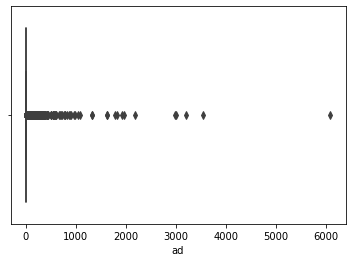

In [ ]:
# Distribution
sb.boxplot(df['ad'])

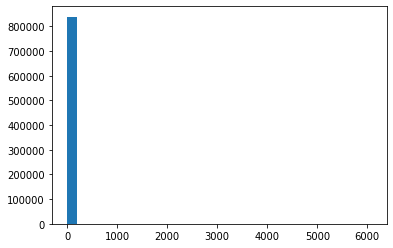

In [ ]:
# Distribution
plt.hist(df['ad'],bins=int(300/10))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


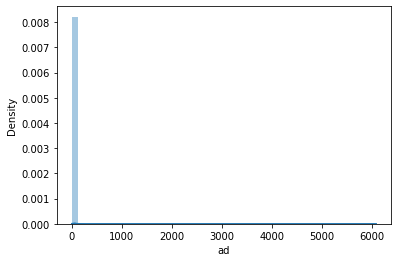

In [ ]:
# Distribution
sb.distplot(df['ad'])

#### Inference and Observations:

* The aphelion distance is the farthest distance between the orbiting body (e.g. a planet) and the focus (e.g. the Earth lies at one focus of a planetary orbit, Moon focus is empty).

* Mean aphelion distance is 3.385704au.
* Minimum aphelion distance observed is 0.773684au.
* 25% Asteroids have aphelion distance of 2.775344au.
* Median aphelion distance is 3.037745
* 75% Asteroids have aphelion distance less than 3.357956au. Remaining 25% Asteroids have greater aphelion distance.
* Maximum aphelion distance observed is 6081.841956.

#### Number of observations used(n_obs_used)

In [ ]:
df['n_obs_used'].describe()

count    839736.000000
mean        254.617708
std         363.004548
min           2.000000
25%          50.000000
50%         118.000000
75%         292.000000
max        9325.000000
Name: n_obs_used, dtype: float64

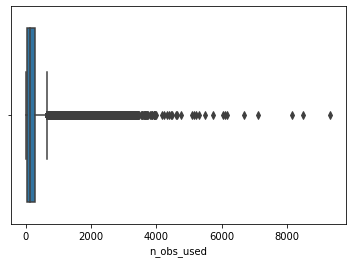

In [ ]:
# box plot
sb.boxplot(x = 'n_obs_used',data = df)

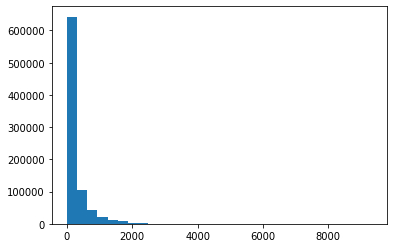

In [ ]:
plt.hist(df['n_obs_used'],bins=int(300/10))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


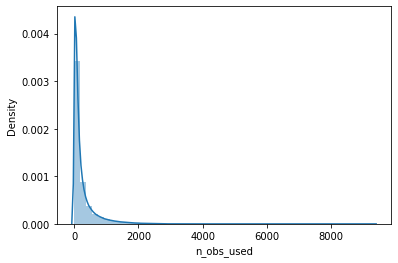

In [ ]:
# Distribution
sb.distplot(df['n_obs_used'])

#### Inference and Observations:

* Basically tells us that how much number of radar observations including both Delay and Doppler Radar Observation are used.

* A radar “delay” measurement is the elapsed time for a signal to travel from transmitter to receiver after reflecting off the target. 

* “Doppler” is the frequency-change measured between receiver and transmitter after reflecting off the object, and is related to the net up and down-leg relative velocity of the object.

* Avg Observations used are approximately 255.

* Minimum 2 number of observations are used.

* 25% Asteroid uses less than 50 observations.


* Median observation used is 118.


* 75% Asteroids uses less than 292. Remaining 25% Asteroids uses more than 292 observations.


* Maximum Observations Used are 9325.

#### Absolute Magnitude

In [ ]:
df['H'].describe()

count    839736.000000
mean         16.792508
std           1.821892
min          -1.100000
25%          15.900000
50%          16.800000
75%          17.600000
max          33.200000
Name: H, dtype: float64

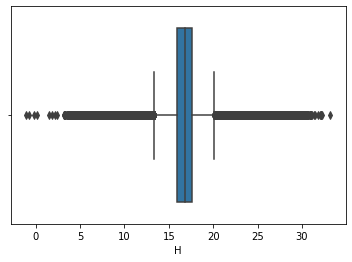

In [ ]:
# box plot
sb.boxplot(x = 'H',data = df)

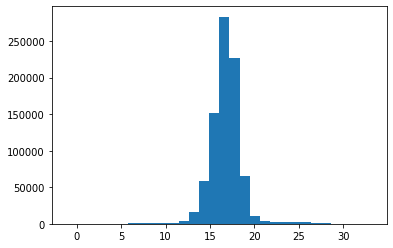

In [ ]:
plt.hist(df['H'],bins=int(300/10))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


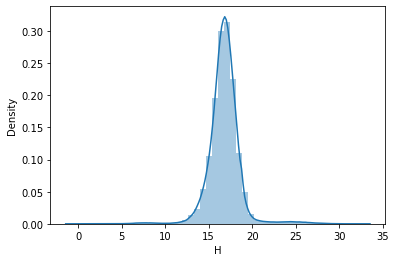

In [ ]:
# Distribution
sb.distplot(df['H'])

#### Inference and Observations:
* An asteroid’s absolute magnitude is the visual magnitude an observer would record if the asteroid were placed 1 Astronomical Unit (au) away, and 1 au from the Sun and at a zero phase angle.

* Avg Absolute Magntiude is 16.789949

* Min Absolute Magntiude is -1.1

* 25% Asteroids have Absolute Magntiude less than 15.9.

* Median Absolute Magntiude is 16.8.

* 75% Asteroids have Absolute Magntiude less than 17.6. Remaining 25% will have greater Absolute Magntiude.

* Maximum Absolute Magntiude observed is 33.2.

#### Geometric albedo(albedo)

In [ ]:
df['albedo'].describe()

count    839736.000000
mean          0.086334
std           0.060946
min           0.001000
25%           0.055647
50%           0.063808
75%           0.085479
max           1.000000
Name: albedo, dtype: float64

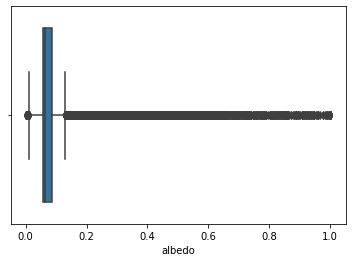

In [ ]:
sb.boxplot(x='albedo',data=df)

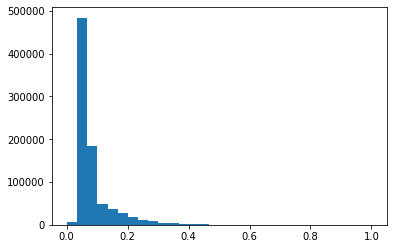

In [ ]:
plt.hist(df['albedo'],bins=int(300/10))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


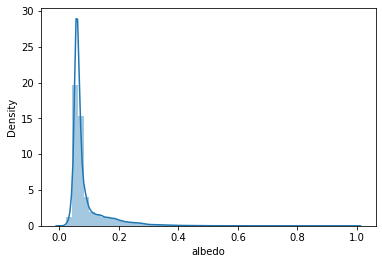

In [ ]:
sb.distplot(df['albedo'])

#### Inference and Observations :

* The geometric albedo of a celestial body is the ratio of its actual brightness as seen from the light source (i.e. at zero phase angle) to that of an idealized flat, fully reflecting, diffusively scattering (Lambertian) disk with the same cross-section. (This phase angle refers to the direction of the light paths and is not a phase angle in its normal meaning in optics or electronics.)

* Diffuse scattering implies that radiation is reflected isotropically with no memory of the location of the incident light source. Zero phase angle corresponds to looking along the direction of illumination. For Earth-bound observers, this occurs when the body in question is at opposition and on the ecliptic.

* The visual geometric albedo refers to the geometric albedo quantity when accounting for only electromagnetic radiation in the visible spectrum.

* Values range from 0 (pitch black) to 1 (perfect reflector).

* Mean Geometric Albedo is 0.086147.

* Minimum value observed is 0.001000.

* 25% Asteroids have Geometric albedo less than 0.055483.

* Median Geometric Albedo is 0.063535
* 75% Asteroids have Geometric Albedo less than 0.085777. 25% Asteroids have greater Albedo Value
* Maximum Geometric Albedo observed is 1.

#### Earth Minimum orbit Intersection Distance(moid)

In [ ]:
df['moid'].describe()

count    8.397360e+05
mean     1.421991e+00
std      2.230367e+00
min      3.437640e-07
25%      9.797800e-01
50%      1.239180e+00
75%      1.591170e+00
max      7.950130e+01
Name: moid, dtype: float64

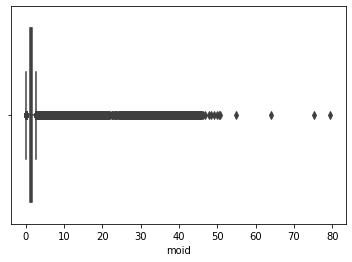

In [ ]:
sb.boxplot(x='moid',data=df)

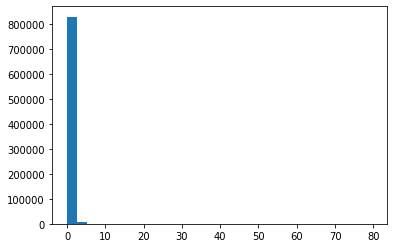

In [ ]:
plt.hist(df['moid'],bins=int(300/10))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


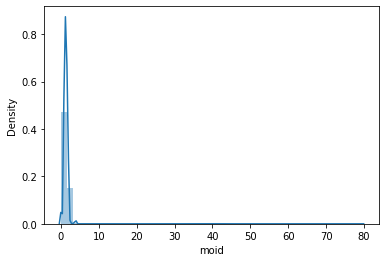

In [ ]:
sb.distplot(df['moid'])

#### Inference and Observations:

* 
Minimum orbit intersection distance (MOID) is a measure used in astronomy to assess potential close approaches and collision risks between astronomical objects. It is defined as the distance between the closest points of the osculating orbits of two bodies. Of greatest interest is the risk of a collision with Earth.

* Based on MOID and H(abs mag), it can be further assess that whether an asteroid is potentially hazardous or not.

* Measurement is done in au(astronomical units).

* Avg MOID is 1.421883au.
* Minimum MOID observed for any asteroid is 3.437640*10<sup>-7</sup>au.
* 25% Asteroids have MOID value less than 9.798295*10<sup>-1</sup>au.
* Median MOID is 1.239070au.
* 75% Asteroids have MOID less than 1.590910au. Remaining 25% have greater MOID values
* Maximum MOID Observed for any asteroid is 79.50130.

#### orbital period(per_y)

In [ ]:
df['per_y'].describe()

count    839736.000000
mean          6.859541
std         252.172353
min           0.000000
25%           3.683896
50%           4.299860
75%           5.185950
max      167877.712688
Name: per_y, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


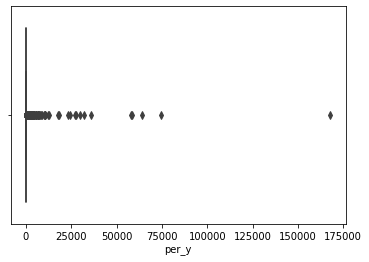

In [ ]:
sb.boxplot(df['per_y'])

In [ ]:
df['per_y'].describe()

count    839736.000000
mean          6.859541
std         252.172353
min           0.000000
25%           3.683896
50%           4.299860
75%           5.185950
max      167877.712688
Name: per_y, dtype: float64

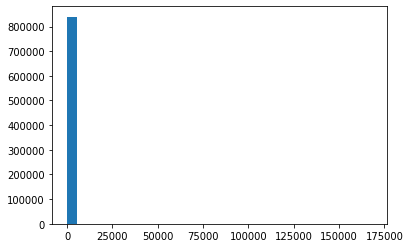

In [ ]:
# Distribution
plt.hist(df['per_y'],bins=int(300/10))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


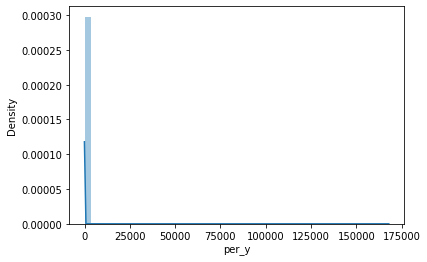

In [ ]:
# Distribution
sb.distplot(df['per_y'])

#### Inference and Observations:
* The orbital period (also revolution period) is the amount of time a given astronomical object takes to complete one orbit around another object. In astronomy, it usually applies to planets or asteroids orbiting the Sun, moons orbiting planets, exoplanets orbiting other stars, or binary stars.

* It is measured in earth-years.

* Avg Orbital Period for Asteroids are 6.859541 earth-years.
* Minimum Orbital Period is 0 earth-year.
* 25% Asteroids have Orbital Period less than 3.683896 earth years.
* Median Orbital Period is 4.299860 earth-years
* 75% Asteroids have Orbital Period less than 5.185950 earth-years. 25% Asteroids will have greater Orbital Period value
* Maximum Orbital Period observed is 167877.712688 earth-years. This Asteroid is farther from the sun. 

#### Observation arc(Data Arc):


In [ ]:
df['data_arc'].describe()

count    839736.000000
mean       5629.146199
std        4162.324731
min           0.000000
25%        3595.000000
50%        5736.000000
75%        7197.000000
max       72684.000000
Name: data_arc, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


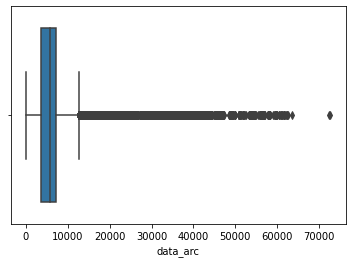

In [ ]:
sb.boxplot(df['data_arc'])

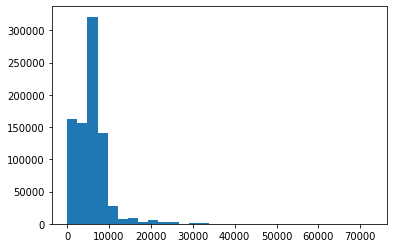

In [ ]:
plt.hist(df['data_arc'],bins=int(300/10))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


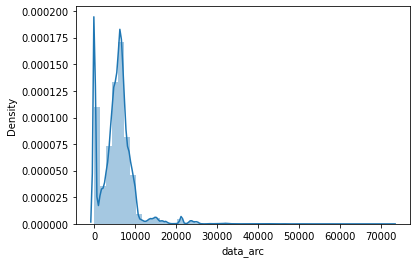

In [ ]:
sb.distplot(df['data_arc'])

#### Inference :
* Mean observation arc observed is 5629.146199 days.
* Minimum Observation arc observed is 0 days.
* 25% Asteroids have Observation arc of less than 3595 days.
* Median Observation arc observed is 5736 days.
* 75% Asteroids have Observation arc less than 7197 days. 25% Asteroids have greater Observation arc.
* Maximum Observation arc observed is 72684.
* After looking at the distribution plot, it can be observed that Observation arc feature follows bimodal distribution.
* One mode value is 2(condition_code is 9) if data_arc=2. Another mode value is somewhere around 5000.
* Some Asteroids have huge values of arc length. This measurement is given in number of days. If an Asteroid has higher value of data arc, it can be said that it's time period between its earliest and latest observations is higher.


### Categorical Features

#### NEO

In [ ]:
df['neo'].describe()

count     839736
unique         2
top            N
freq      818346
Name: neo, dtype: object

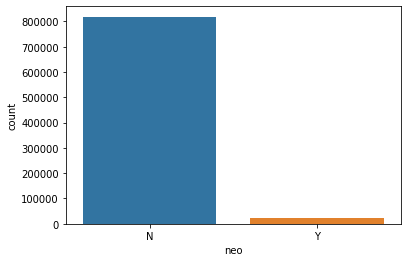

In [ ]:
sb.countplot(data = df, x = 'neo')

In [ ]:
df['neo'].value_counts()

N    818346
Y     21390
Name: neo, dtype: int64

#### Inference and Observations :
* Basically tells whether an Asteroid is Nearer to Earth's Orbit.

* An asteroid or comet with a perihelion distance less than or equal to 1.3 au. 99% of NEOs are asteroids.

* Out of 839736 Asteroids, 21390 Asteroids are Near Earth Objects

#### PHA

In [ ]:
df['pha'].describe()

count     839736
unique         2
top            N
freq      837722
Name: pha, dtype: object

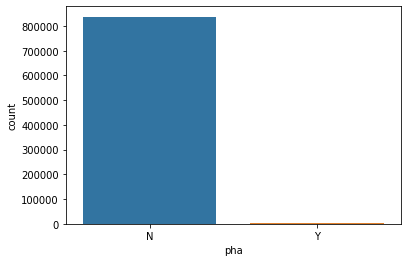

In [ ]:
sb.countplot(data = df, x = 'pha')

In [ ]:
df['pha'].value_counts()

N    837722
Y      2014
Name: pha, dtype: int64

#### Inference and Observations :
* Basically tells whether an Asteroid is Hazardous when collided wwith Earth.

* An asteroid with a minimum orbit intersection distance (MOID) of 0.05 au or less and an absolute magnitude (H) of 22.0 or less is considered as PHAs.

* Out of 839736 Asteroids, 2031 Asteroids are Physcially Hazardous Asteroids.

#### condition_code

In [ ]:
df=df

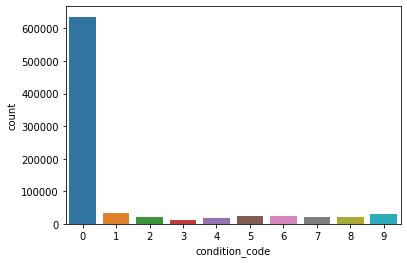

In [ ]:
sb.countplot(data = df, x = 'condition_code')

In [ ]:
df['condition_code'].value_counts()

0    635884
1     32781
9     31379
5     25228
6     23043
7     20630
2     20289
8     19945
4     17792
3     12765
Name: condition_code, dtype: int64

#### Inference and Observations :

* The orbit condition code, also known as the U uncertainty parameter, is an integer between 0 and 9 indicating how well an object's orbit is known on a logarithmic scale, where 0 indicates a well-determined orbit.

* Orbit condition codes are particularly important when computing spacecraft transfer trajectories several years or more after the latest observation, since the code indicates how the uncertainty of a small-body's position grows with time. Small-bodies with higher orbit condition codes imply inherently greater uncertainty in the existence and ΔV-values associated with trajectories to those bodies. Orbit condition codes can be reduced when more optical or radar observations become available.

<table>
<tr>
<th>Orbit Condition Code</th>
<th>Longitude runoff per decade</th>
</tr>
<tr>
<td>0</td>
<td>< 1.0 arc seconds</td>
</tr>
<tr>
<td>1</td>
<td>< 4.4 arc seconds</td>
</tr>
<tr>
<td>2</td>
<td>< 19.6 arc seconds</td>
</tr>
<tr>
<td>3</td>
<td>< 1.4 arc minutes</td>
</tr>
<tr>
<td>4</td>
<td>< 6.4 arc minutes</td>
</tr>
<tr>
<td>5</td>
<td>< 28.2 arc minutes</td>
</tr>
<tr>
<td>6</td>
<td>< 2.1 degrees</td>
</tr>
<tr>
<td>7</td>
<td>< 9.2 degrees</td>
</tr>
<tr>
<td>8</td>
<td>< 40.7 degrees</td>
</tr>
<tr>
<td>9</td>
<td>> 40.7 degrees</td>
</tr>


* Almost all Asteroids have well defined orbits. Although there are some asteroids whose orbits are not defined ppretty well.

## Bivariate Analysis

### Numerical Features

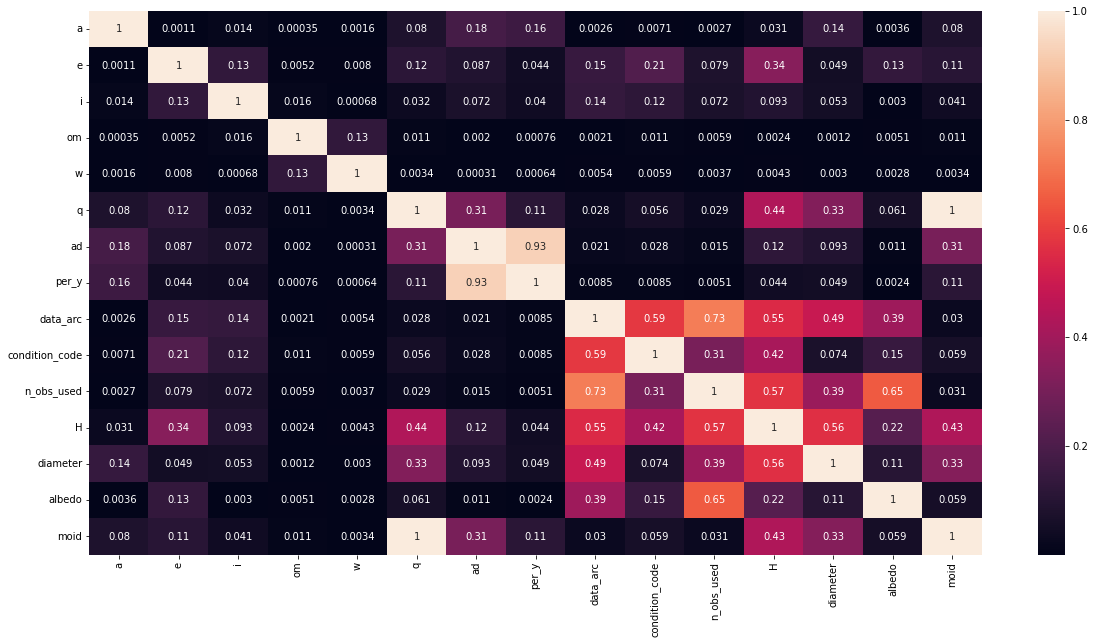

In [ ]:
# First Check correlation of all features
plt.figure(figsize=(20,10))
sb.heatmap(corr_matrix.abs(), annot=True)  
# displaying heatmap
plt.show()

#### Inference:
From the given correlation matrix, we can observe the Higher correlation betwween the features that are given below:

1. Perihelion distance(q) and moid(Minimum Orbit Intersection distance).

2. Aphelion distance(ad) and orbital period(per_y).


**For Data Arc:**

1. Data Arc and Orbit Condition Code(condition_code).

2. Data Arc and No of Observations Used.

3. Data Arc and Absolute Magnitude(H).

**For Orbit Condition Code:**

1. Data Arc and Orbit Condition Code(condition_code).

**For No of Observations Used:**

1. No of Observations Used and Data Arc.

2. No of Observations Used and Absolute Magnitude(H).

3. No of Observations Used and Geometric Albedo(albedo).

**For Absolute Magnitude(H):**

1. Data Arc and No of Absolute Magnitude(H).

2. No of Observations Used and Absolute Magnitude(H).

3. Diameter and Absolute Magnitude(H).

**For Diameter:**

1. Diameter and Absolute Magnitude(H).

**For Geometric Albedo(albedo):**
1. No of Observations Used and Geometric Albedo(albedo).

#### Perihelion distance(q) vs Minimum Orbit Intersection Distance(moid)

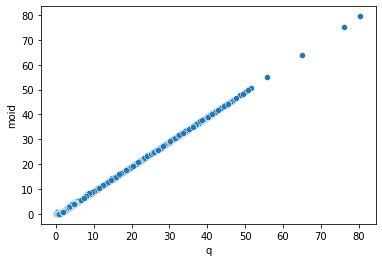

In [ ]:
sb.scatterplot(x='q',y='moid',data=df)

##### Inference :

1. A Positive Linear Relationship can be observed from the above scatterplots.
2. As perihelion distance increases, Minimum Orbit Intersection also Increases. 

#### Aphelion Distance(ad) vs Orbital Period(per_y):

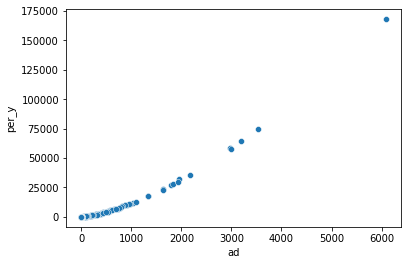

In [ ]:
sb.scatterplot(x='ad',y='per_y',data=df)

##### Inference:
1. An exponential relation is observed.
2. As aphelion distance increases, Orbital Period also increases exponentially.

#### Data Arc vs Orbit Condition Code

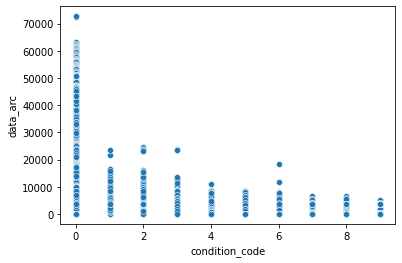

In [ ]:
sb.scatterplot(x='condition_code',y='data_arc',data=df)

##### Inference:
1. For all well defined orbits, The value of data arc is observed here.

2. If the orbits are not that well defined, The data arc value is lower.

#### Data Arc vs No of Observations

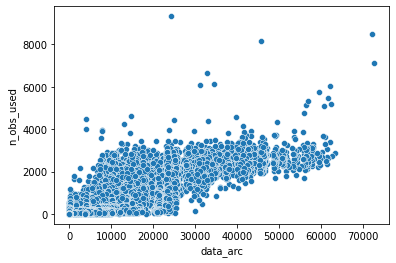

In [ ]:
sb.scatterplot(x='data_arc',y='n_obs_used',data=df)

##### Inference:
1. Higher data arc requires higher number of observations.

#### Data Arc vs Absolute Magnitude(H)

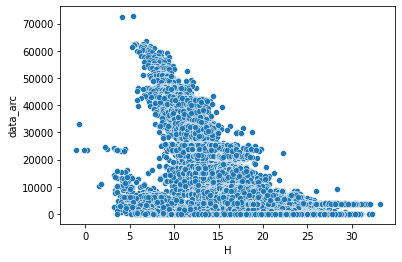

In [ ]:
sb.scatterplot(x='H',y='data_arc',data=df)

##### Inference:

1. For H = 0-9, data arc is observed to lie between 0 to 30000.
2. For H = 10-19, data arc value increases.
3. For H = 20 and above, data arc lies between 0 to 10000.

#### No of Observations and absolute Magnitude(H)

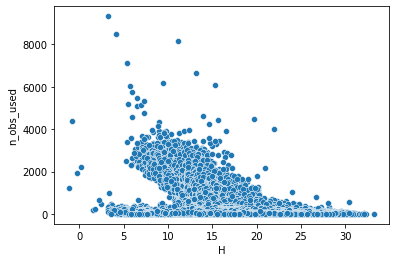

In [ ]:
sb.scatterplot(x='H',y='n_obs_used',data=df)

1. For H = 0-9, We have used lower no of observations.
2. For H = 10-19, Higher no of observations are used.
3. For H = 20 and above, again lower no of observations are used.

#### No of Observations vs Geometric albedo(albedo):

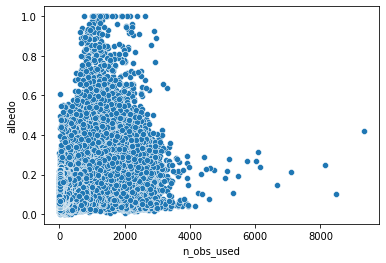

In [ ]:
sb.scatterplot(x='n_obs_used',y='albedo',data=df)

##### Inference:
1. For albedo between 0 to 0.5, Higher no of observations are used.
2. For higher albedo values, Lower no of observations are used

#### Diameter vs Absolute Magnitude(H)

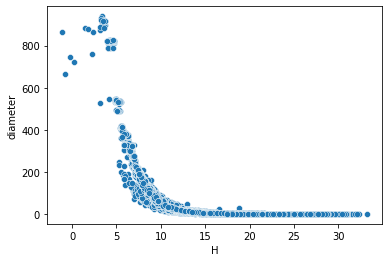

In [ ]:
sb.scatterplot(x='H',y='diameter',data=df)

#### Inference:
1. If the value of absolute magnitude is less than 10, higher values of diameter are observed.
2. As absolute magnitude move towards 10, lower diameter values are observed.

### Categorical Features

### NEO

### We know that if q<=1.3, our asteroid is a neo

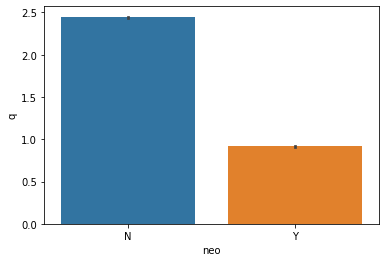

In [ ]:
sb.barplot(x='neo',y='q',data=df)

#### Inference:
1. For all asteroids to be Near Earth Objects(NEO), perihelion distance(q) should be less than or equal to 1.3au.

2. By Looking at the above barplot, it can be said that most of the asteroids who have perihelion distance > 1.3 are not Near Earth Objects.

3. In order to get more indepth relationship, we will try to compare this feature with another features  

### PHA

# If moid<=0.05 and H<=22, Then Asteroid is Potentially Hazardous( both of the conditions has to be true. If either one of them is false, then the Asteroid is not PHA)

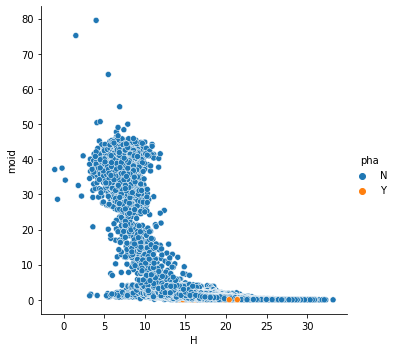

In [ ]:
sb.relplot(x='H',y='moid',hue='pha',data=df)

##### Inference:

1. Difficult to spot all points because of higher imbalance of datappoints.
2. 2031 Asteroids are potentially hazardous asteroids. Remaining Asteroids are not hazardous.

## Multivariate Analysis

### NEO(Near Earth Object)

In [ ]:
# dummy dataset for multivariate plotting wrt to Near Earth Object(neo)
# Dropping the full_name and pha feature
d1=df.copy()
d1.drop(columns=['a','e','i','om','ad','per_y','full_name','pha'],axis=1,inplace=True)

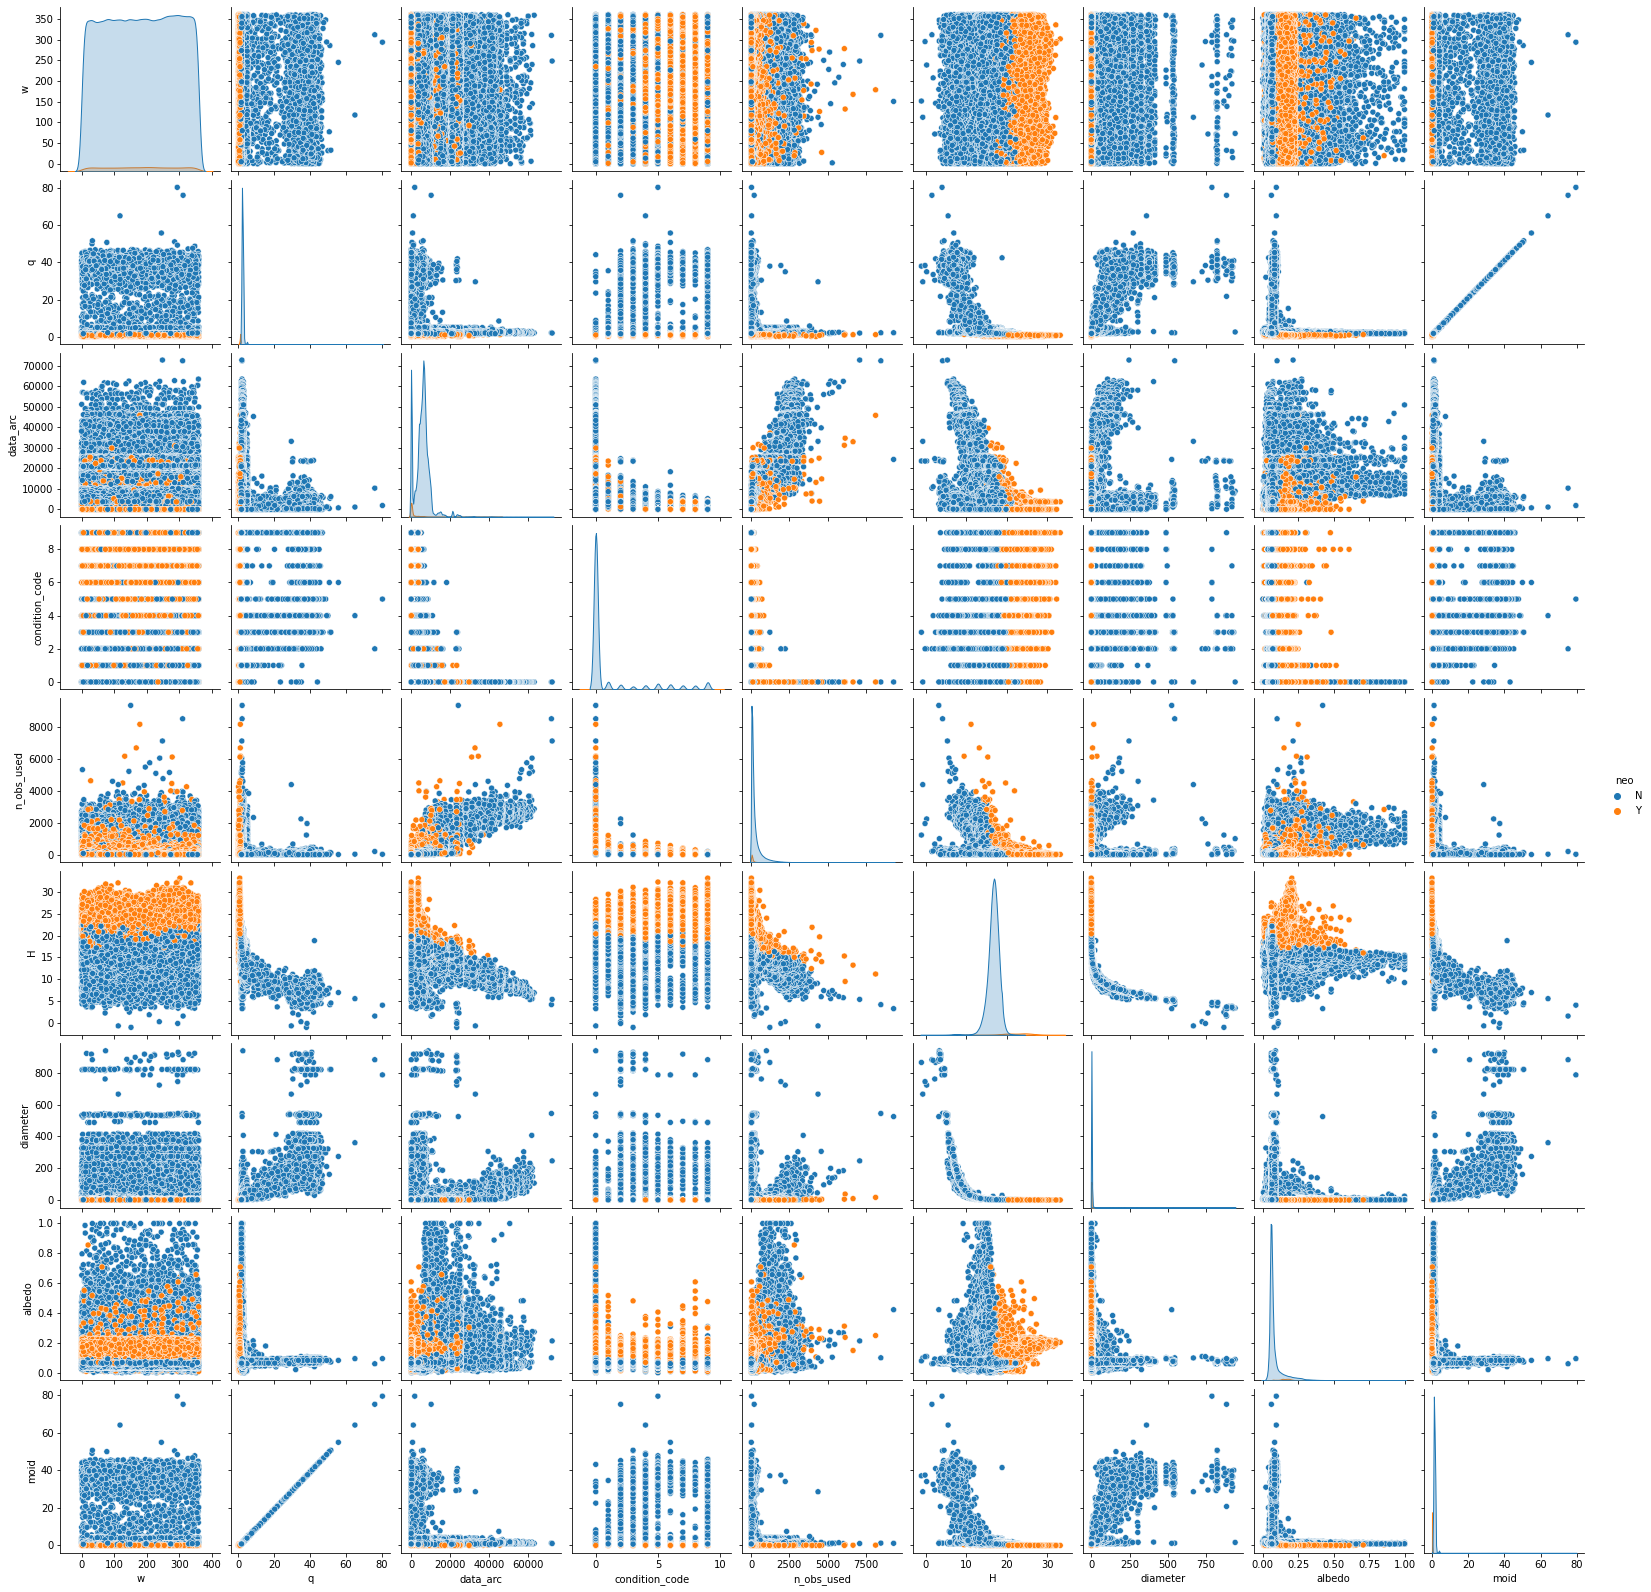

In [ ]:
sb.pairplot(d1,hue='neo')
plt.show()

#### Inference:
1. If the value of moid is lower, Then Asteroid is NEO.
2. If the orbit condition code are not well defined(Lying between 6 to 9), Then there is a higher chance that our asteroids are NEO.
3. If the Absolute Magnitude(H) is higher ie 20-35, Then there is a higher chance that our asteroids are NEO.
4. If perihelion distance(q)<=1.3au, Asteroid is NEO(Most important condition).
5. For all our asteroids to fall under NEO, q<=1.3au is the most impportant condition. The above conditions for Asteroid to be a NEO will be useless until and unless q<=1.3au.

### PHA(Physically Hazardous Asteroid)

In [ ]:
df2=df.copy()
df2.drop(['a','e','i','om','ad','per_y','full_name','neo'],axis=1,inplace=True)

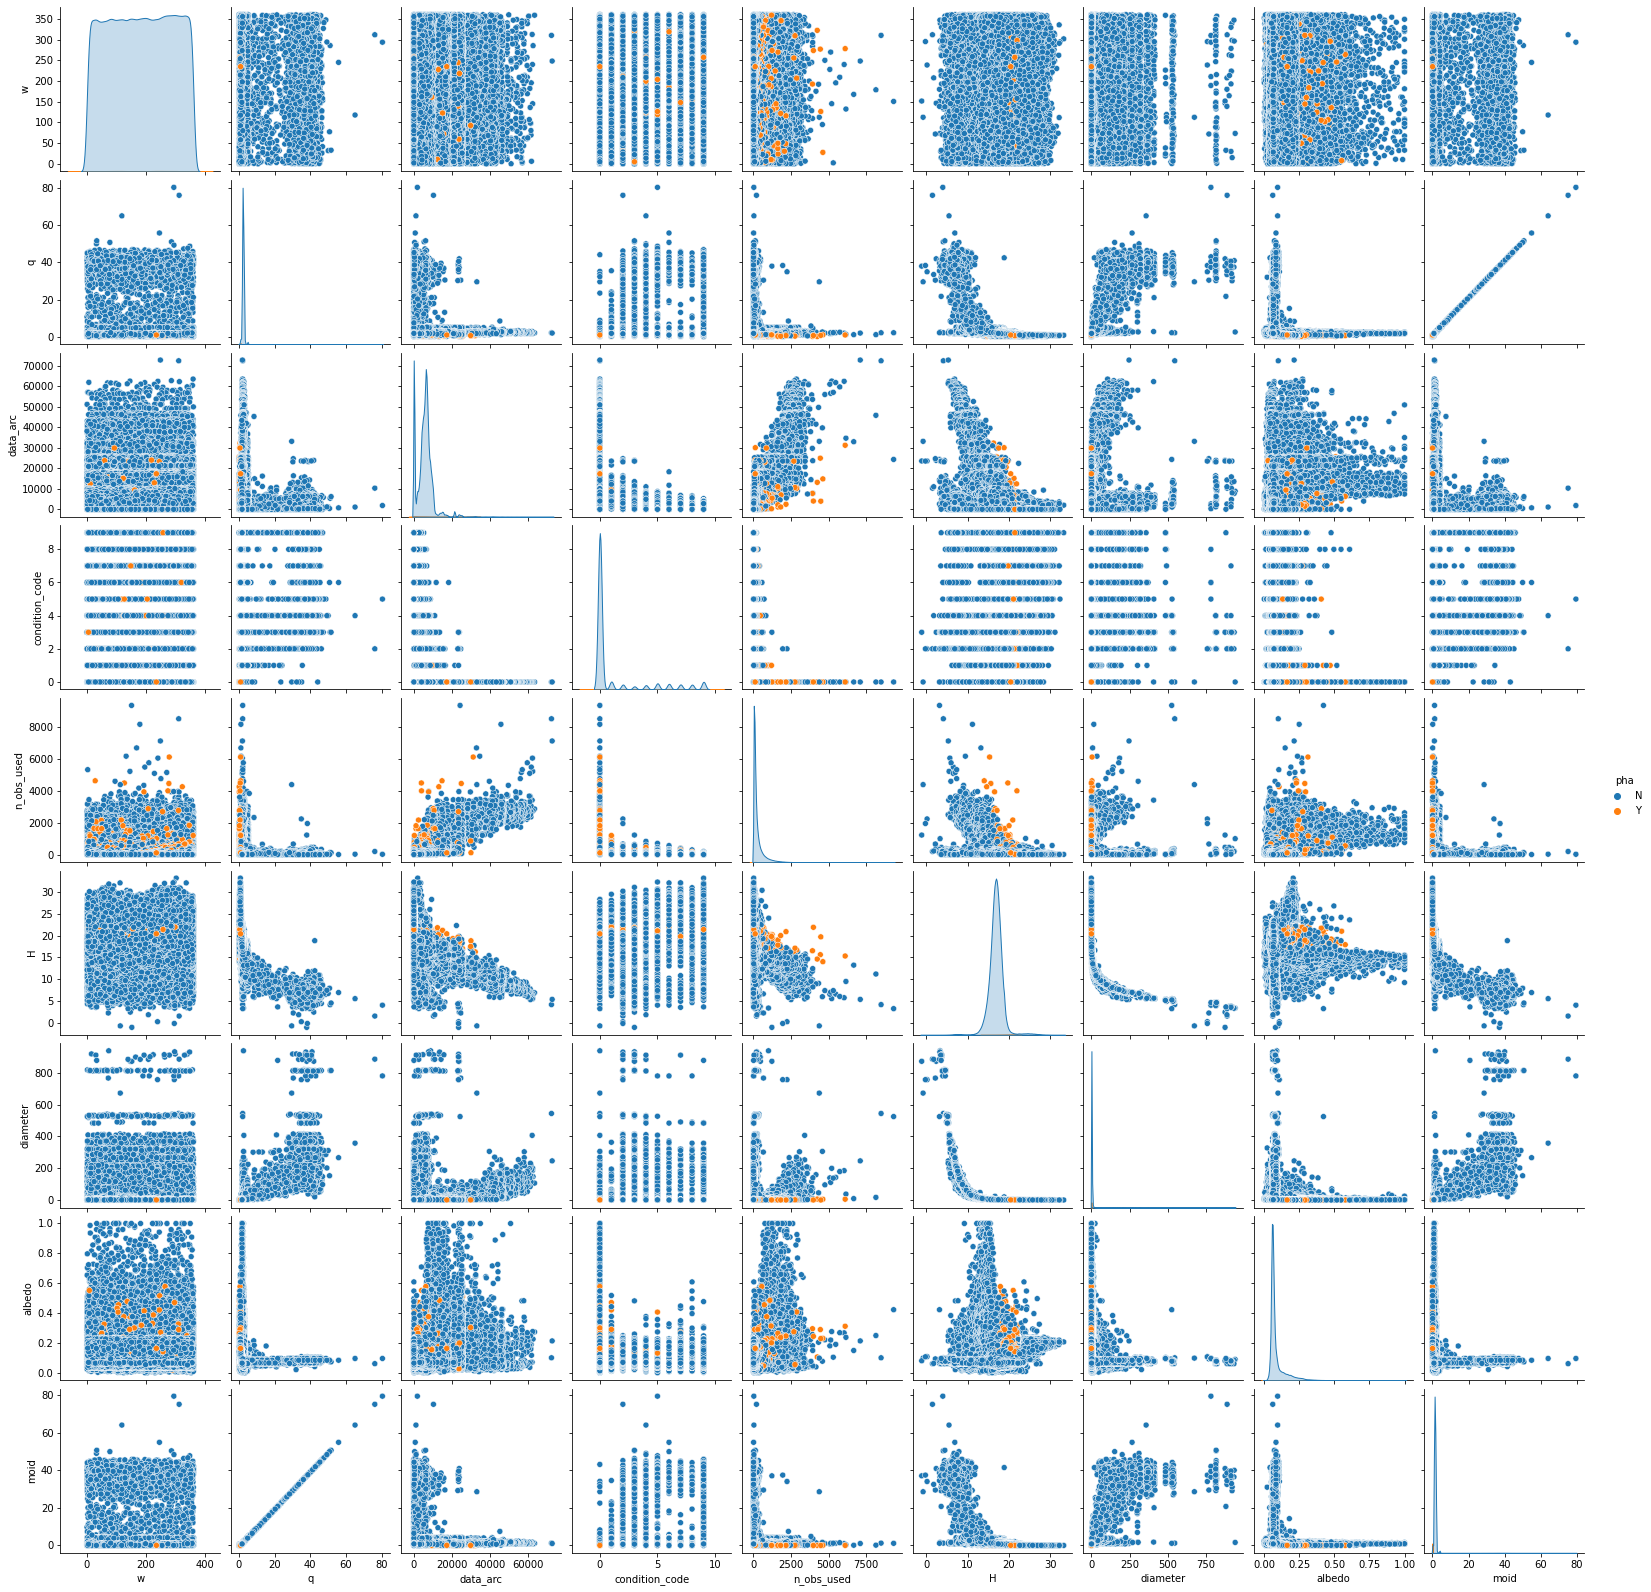

In [ ]:
sb.pairplot(df2,hue='pha')
plt.show()

### Binning the Diameter Feature

 #### Binning is based on following conditions:
 * If the diameter is less than equal to 10 km, Then the diameter is binned as small.





 * If the diameter is greater 10 km and less than equal to 100 km, Then the diameter is binned as small.




* If the diameter is greater 100 km and less than equal to 500 km, Then the diameter is binned as large.



* If the diameter is greater 500 km, Then the diameter is binned as very large.




* Else diameter is binned as missing if it does not have any numerical values.

In [ ]:
def get_gen_grp(diam):
    
    if (diam <= 10):
        return 'Small'
    
    elif (diam > 10) and (diam <= 100):
        return 'Medium'
    
    elif (diam > 100) and (diam <= 500):
        return 'Large'

    elif (diam > 500):
        return 'Very Large'
    
    else:
        return 'Missing'

In [ ]:
df['diam_bin'] = df['diameter'].apply(get_gen_grp)

In [ ]:
df.dtypes

full_name          object
a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code     object
n_obs_used          int64
H                 float64
diameter          float64
albedo            float64
neo                object
pha                object
moid              float64
diam_bin           object
dtype: object

#### Checking the correlation between binned diameter feature and other categorical features

In [ ]:
df_cat = pd.DataFrame(data = df.dtypes, columns = 
                                         ['a']).reset_index()
cat_var = list(df_cat['index'].loc[df_cat['a'] == 'object'])
cat_var=cat_var[1:]
cat_var

['condition_code', 'neo', 'pha', 'diam_bin']

In [ ]:
df_cat = df[cat_var]
df_cat.head()

condition_code neo pha    diam_bin
0              0   N   N  Very Large
1              0   N   N  Very Large
2              0   N   N       Large
3              0   N   N  Very Large
4              0   N   N       Large

In [ ]:
cat_var1=('condition_code', 'neo', 'pha', 'diam_bin')
cat_var2=('condition_code', 'neo', 'pha', 'diam_bin')
cat_var_prod = list(product(cat_var1,cat_var2, repeat = 1))
cat_var_prod

[('condition_code', 'condition_code'),
 ('condition_code', 'neo'),
 ('condition_code', 'pha'),
 ('condition_code', 'diam_bin'),
 ('neo', 'condition_code'),
 ('neo', 'neo'),
 ('neo', 'pha'),
 ('neo', 'diam_bin'),
 ('pha', 'condition_code'),
 ('pha', 'neo'),
 ('pha', 'pha'),
 ('pha', 'diam_bin'),
 ('diam_bin', 'condition_code'),
 ('diam_bin', 'neo'),
 ('diam_bin', 'pha'),
 ('diam_bin', 'diam_bin')]

In [ ]:
df_cat_v1 = df_cat
df_cat_v1.shape

(839736, 4)

#### Using Chi square To check correlation between categorical features and target binned feature

In [ ]:
result = []
for i in cat_var_prod:
  if i[0] != i[1]:
    result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(
                            df_cat_v1[i[0]], df_cat_v1[i[1]])))[1]))
result

[('condition_code', 'neo', 0.0),
 ('condition_code', 'pha', 1.715899791855448e-225),
 ('condition_code', 'diam_bin', 0.0),
 ('neo', 'condition_code', 0.0),
 ('neo', 'pha', 0.0),
 ('neo', 'diam_bin', 0.0),
 ('pha', 'condition_code', 1.715899791855252e-225),
 ('pha', 'neo', 0.0),
 ('pha', 'diam_bin', 3.09189282110689e-11),
 ('diam_bin', 'condition_code', 0.0),
 ('diam_bin', 'neo', 0.0),
 ('diam_bin', 'pha', 3.091892821106879e-11)]

Chi-square test finds the probability of a Null hypothesis(H0).

* Assumption(H0): The two columns are NOT related to each other
* Result of Chi-Sq Test: The Probability of H0 being True
* It can help to understand whether both the categorical variables are correlated with each other or not.

In [ ]:
chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2', 
                                                       'coeff'])
## Using pivot function to convert the above DataFrame into a crosstab
chi_test_output.pivot(index='var1', columns='var2', values='coeff')

var2            condition_code      diam_bin  neo            pha
var1                                                            
condition_code             NaN  0.000000e+00  0.0  1.715900e-225
diam_bin          0.000000e+00           NaN  0.0   3.091893e-11
neo               0.000000e+00  0.000000e+00  NaN   0.000000e+00
pha              1.715900e-225  3.091893e-11  0.0            NaN

* H0(Null Hypothesis): The variables are not correlated with each other. This is the H0 used in the Chi-square test.

* In the above example, the P-value with respect to binned diameter feature came lower than 0.05. Hence H0 will be rejected. Which means the variables are dependent with each other.

* Lower significance value, Null hypothesis gets rejected.

#### Summary:
* condition_code has significance value w.r.t diameter 0. Null hypothesis doesn't get accepted since significance value is 0. It means that diameter and condition code are correlated.
* neo has significance value w.r.t diameter 0. Null hypothesis doesn't get accepted since significance value is 0. It means that diameter and condition code are correlated.
* pha has significance value w.r.t diameter 3.091893*10<sup>-11</sup>. Null hypothesis doesn't get accepted since significance value is less than 0.005. It means that diameter and condition code are correlated.
* We can conclude that binned diameter is highly correlated with neo,pha and condition_code feature. 


#### Creating the below variables for plotting pdf and cdf 

#### PDF

In [ ]:
### Building up the hue binned values
small=df.loc[df['diam_bin']=="Small"]
med=df.loc[df['diam_bin']=="Medium"]
large=df.loc[df['diam_bin']=="Large"]
vlarge=df.loc[df['diam_bin']=="Very Large"]
missing=df.loc[df['diam_bin']=="Missing"]

##### Absolute Magnitude(H)

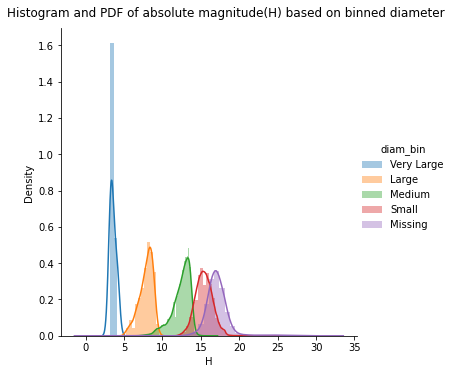

In [ ]:
sb.FacetGrid(df,hue='diam_bin',size=5,)\
.map(sb.distplot,'H')\
.add_legend()
plt.suptitle("Histogram and PDF of absolute magnitude(H) based on binned diameter",y=1.03)
plt.show()

##### Earth Minimum Orbit Intersection Distance

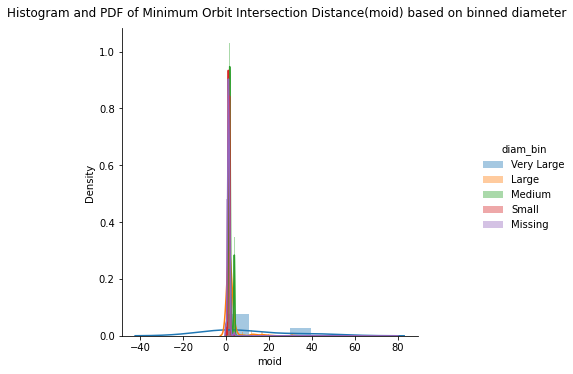

In [ ]:
sb.FacetGrid(df,hue='diam_bin',size=5,)\
.map(sb.distplot,'moid')\
.add_legend()
plt.suptitle("Histogram and PDF of Minimum Orbit Intersection Distance(moid) based on binned diameter",y=1.03)
plt.show()

##### Geometric Albedo(albedo)

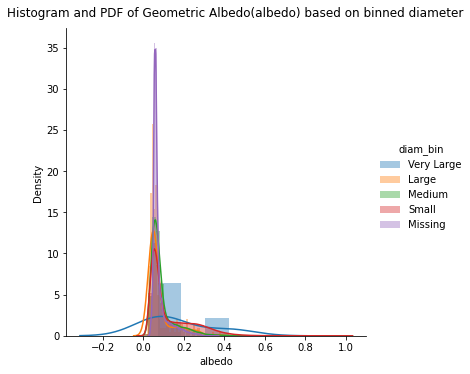

In [ ]:
sb.FacetGrid(df,hue='diam_bin',size=5,)\
.map(sb.distplot,'albedo')\
.add_legend()
plt.suptitle("Histogram and PDF of Geometric Albedo(albedo) based on binned diameter",y=1.03)
plt.show()

##### Observation arc(data_arc)

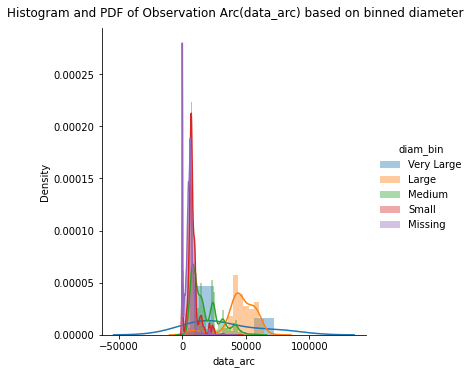

In [ ]:
sb.FacetGrid(df,hue='diam_bin',size=5,)\
.map(sb.distplot,'data_arc')\
.add_legend()
plt.suptitle("Histogram and PDF of Observation Arc(data_arc) based on binned diameter",y=1.03)
plt.show()

##### Orbital Period

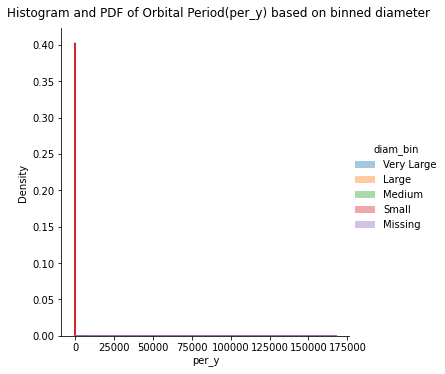

In [ ]:
sb.FacetGrid(df,hue='diam_bin',size=5,)\
.map(sb.distplot,'per_y')\
.add_legend()
plt.suptitle("Histogram and PDF of Orbital Period(per_y) based on binned diameter",y=1.03)
plt.show()

##### No of Radar Observations used(n_obs_used)

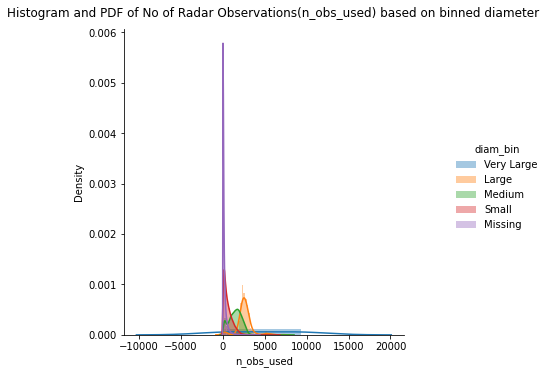

In [ ]:
sb.FacetGrid(df,hue='diam_bin',size=5,)\
.map(sb.distplot,'n_obs_used')\
.add_legend()
plt.suptitle("Histogram and PDF of No of Radar Observations(n_obs_used) based on binned diameter",y=1.03)
plt.show()

##### Perihelion Distance(q)

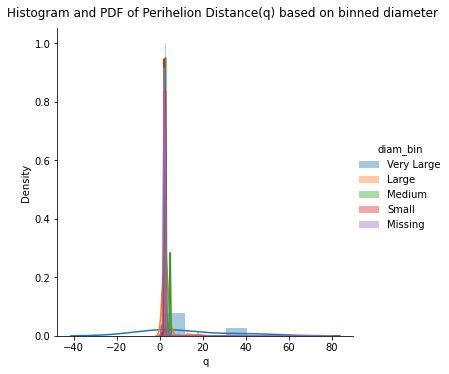

In [ ]:
sb.FacetGrid(df,hue='diam_bin',size=5,)\
.map(sb.distplot,'q')\
.add_legend()
plt.suptitle("Histogram and PDF of Perihelion Distance(q) based on binned diameter",y=1.03)
plt.show()

##### Aphelion Distance(ad) 

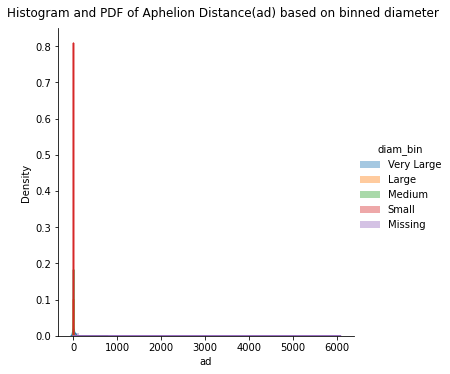

In [ ]:
sb.FacetGrid(df,hue='diam_bin',size=5,)\
.map(sb.distplot,'ad')\
.add_legend()
plt.suptitle("Histogram and PDF of Aphelion Distance(ad) based on binned diameter",y=1.03)
plt.show()

##### Longitude of ascending node(om)

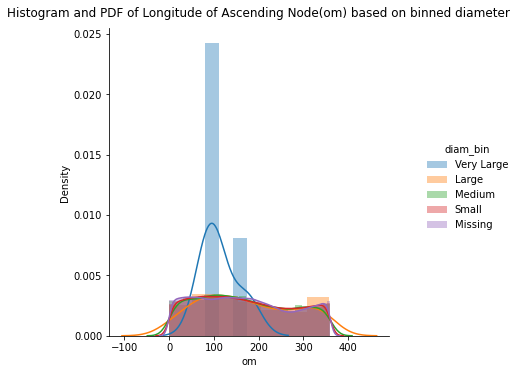

In [ ]:
sb.FacetGrid(df,hue='diam_bin',size=5,)\
.map(sb.distplot,'om')\
.add_legend()
plt.suptitle("Histogram and PDF of Longitude of Ascending Node(om) based on binned diameter",y=1.03)
plt.show()

##### Semi-major axis(a)

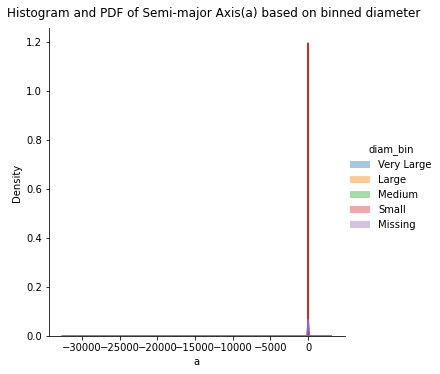

In [ ]:
sb.FacetGrid(df,hue='diam_bin',size=5,)\
.map(sb.distplot,'a')\
.add_legend()
plt.suptitle("Histogram and PDF of Semi-major Axis(a) based on binned diameter",y=1.03)
plt.show()

##### Eccentricity(e)

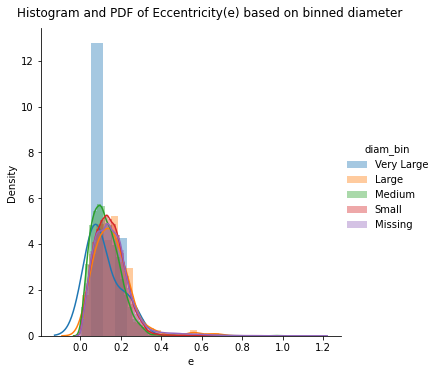

In [ ]:
sb.FacetGrid(df,hue='diam_bin',size=5,)\
.map(sb.distplot,'e')\
.add_legend()
plt.suptitle("Histogram and PDF of Eccentricity(e) based on binned diameter",y=1.03)
plt.show()

##### Inclination

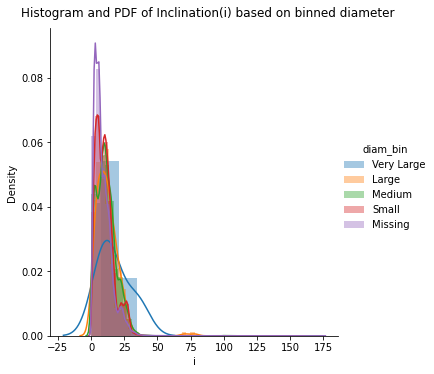

In [ ]:
sb.FacetGrid(df,hue='diam_bin',size=5,)\
.map(sb.distplot,'i')\
.add_legend()
plt.suptitle("Histogram and PDF of Inclination(i) based on binned diameter",y=1.03)
plt.show()

##### Argument of perihelion(w)

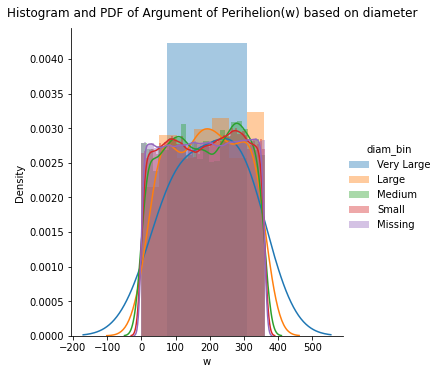

In [ ]:
sb.FacetGrid(df,hue='diam_bin',size=5,)\
.map(sb.distplot,'w')\
.add_legend()
plt.suptitle("Histogram and PDF of Argument of Perihelion(w) based on diameter",y=1.03)
plt.show()

#### Inference:
* After Looking at the pdfs of all features based on binned diameter, It can be observed that Absolute Magnitude(H) is very helpful in determining the diameter classes.
* For Very Larger Diameters, H ranges between 0 to 5 for most of the values.
* For Larger Diameters, H ranges between 5 to 10 for most of the values.
* For Medium Diameters, H ranges between 11 to 15 for most of the values. Altough there are some diameters whose H is lying around 9 to 10.
* For Smaller Diameters, H ranges between 14 to 20 for most of the values. For some diameters, H even exceeds 20 towards it maximum possible value.
* For Missing Diameters, H ranges between 0 to 35. For most of diameter missing values, H lies around 16 to 18.

#### CDF

Absolute Magnitude(H)

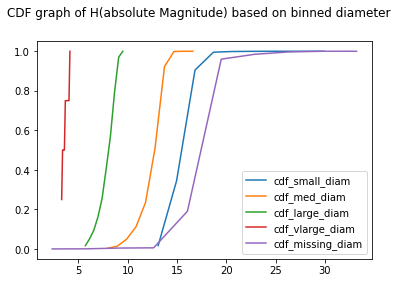

In [ ]:
cnt,bi_ed=np.histogram(small['H'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(med['H'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(large['H'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(vlarge['H'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(missing['H'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

#Plotting the legend
plt.legend('size')
plt.legend(['cdf_small_diam','cdf_med_diam', 'cdf_large_diam','cdf_vlarge_diam','cdf_missing_diam'])
#Showing the graph finally
plt.suptitle("CDF graph of H(absolute Magnitude) based on binned diameter",y=1.001)
plt.show()

##### Geometric Albedo(albedo)

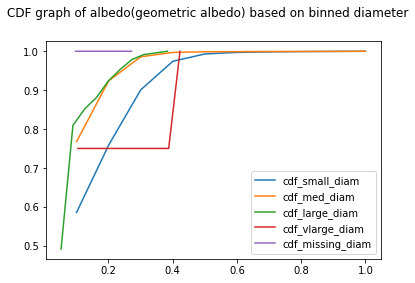

In [ ]:
cnt,bi_ed=np.histogram(small['albedo'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(med['albedo'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(large['albedo'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(vlarge['albedo'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(missing['albedo'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

#Plotting the legend
plt.legend('size')
plt.legend(['cdf_small_diam','cdf_med_diam', 'cdf_large_diam','cdf_vlarge_diam','cdf_missing_diam'])
#Showing the graph finally
plt.suptitle("CDF graph of albedo(geometric albedo) based on binned diameter",y=1.001)
plt.show()

##### Earth Minimum Orbit Intersection Distance(moid)

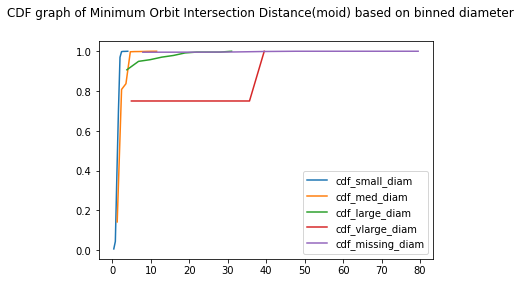

In [ ]:
cnt,bi_ed=np.histogram(small['moid'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(med['moid'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(large['moid'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(vlarge['moid'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(missing['moid'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

#Plotting the legend
plt.legend('size')
plt.legend(['cdf_small_diam','cdf_med_diam', 'cdf_large_diam','cdf_vlarge_diam','cdf_missing_diam'])
#Showing the graph finally
plt.suptitle("CDF graph of Minimum Orbit Intersection Distance(moid) based on binned diameter",y=1.001)
plt.show()

##### Longitude of ascending node(om)

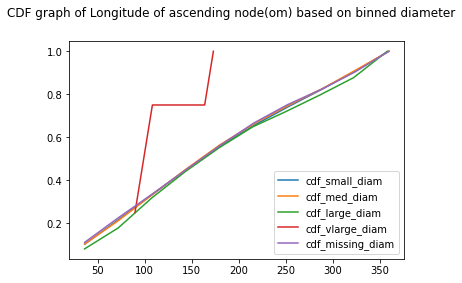

In [ ]:
cnt,bi_ed=np.histogram(small['om'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(med['om'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(large['om'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(vlarge['om'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(missing['om'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

#Plotting the legend
plt.legend('size')
plt.legend(['cdf_small_diam','cdf_med_diam', 'cdf_large_diam','cdf_vlarge_diam','cdf_missing_diam'])
#Showing the graph finally
plt.suptitle("CDF graph of Longitude of ascending node(om) based on binned diameter",y=1.001)
plt.show()

##### perihelion distance(q)

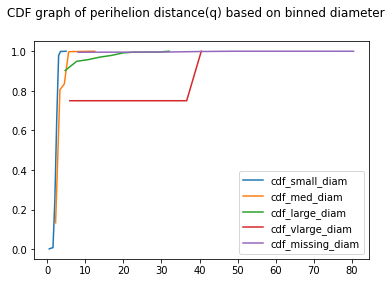

In [ ]:
cnt,bi_ed=np.histogram(small['q'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(med['q'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(large['q'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(vlarge['q'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(missing['q'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

#Plotting the legend
plt.legend('size')
plt.legend(['cdf_small_diam','cdf_med_diam', 'cdf_large_diam','cdf_vlarge_diam','cdf_missing_diam'])
#Showing the graph finally
plt.suptitle("CDF graph of perihelion distance(q) based on binned diameter",y=1.001)
plt.show()

##### aphelion distance(ad)

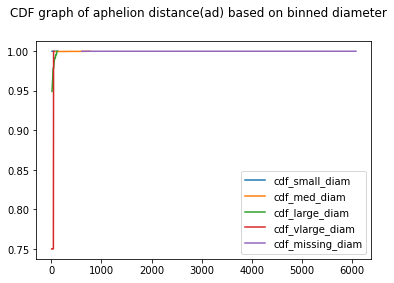

In [ ]:
cnt,bi_ed=np.histogram(small['ad'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(med['ad'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(large['ad'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(vlarge['ad'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(missing['ad'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

#Plotting the legend
plt.legend('size')
plt.legend(['cdf_small_diam','cdf_med_diam', 'cdf_large_diam','cdf_vlarge_diam','cdf_missing_diam'])
#Showing the graph finally
plt.suptitle("CDF graph of aphelion distance(ad) based on binned diameter",y=1.001)
plt.show()

##### Observation arc(data_arc)

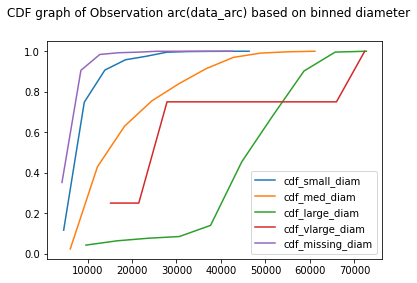

In [ ]:
cnt,bi_ed=np.histogram(small['data_arc'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(med['data_arc'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(large['data_arc'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(vlarge['data_arc'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(missing['data_arc'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

#Plotting the legend
plt.legend('size')
plt.legend(['cdf_small_diam','cdf_med_diam', 'cdf_large_diam','cdf_vlarge_diam','cdf_missing_diam'])
#Showing the graph finally
plt.suptitle("CDF graph of Observation arc(data_arc) based on binned diameter",y=1.001)
plt.show()

##### No of Radar Observations used(n_obs_used)

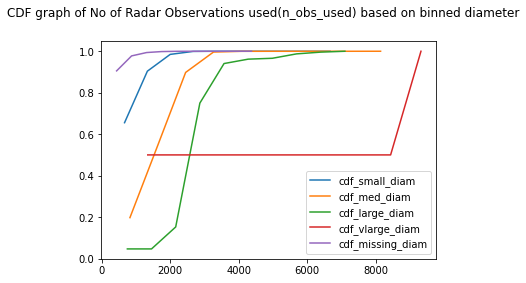

In [ ]:
cnt,bi_ed=np.histogram(small['n_obs_used'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(med['n_obs_used'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(large['n_obs_used'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(vlarge['n_obs_used'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(missing['n_obs_used'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

#Plotting the legend
plt.legend('size')
plt.legend(['cdf_small_diam','cdf_med_diam', 'cdf_large_diam','cdf_vlarge_diam','cdf_missing_diam'])
#Showing the graph finally
plt.suptitle("CDF graph of No of Radar Observations used(n_obs_used) based on binned diameter",y=1.001)
plt.show()

##### Argument of perihelion(w)

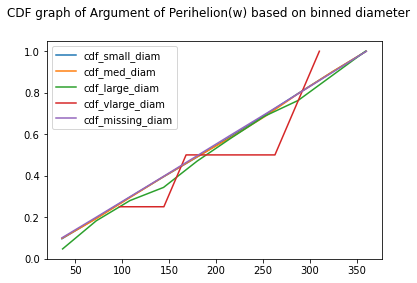

In [ ]:
cnt,bi_ed=np.histogram(small['w'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(med['w'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(large['w'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(vlarge['w'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(missing['w'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

#Plotting the legend
plt.legend('size')
plt.legend(['cdf_small_diam','cdf_med_diam', 'cdf_large_diam','cdf_vlarge_diam','cdf_missing_diam'])
#Showing the graph finally
plt.suptitle("CDF graph of Argument of Perihelion(w) based on binned diameter",y=1.001)
plt.show()

##### Eccentricity(e)

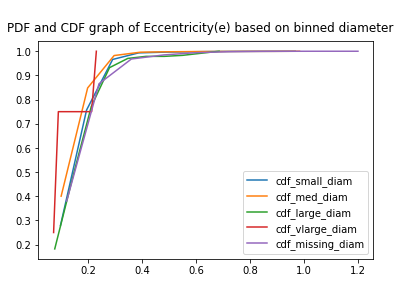

In [ ]:
cnt,bi_ed=np.histogram(small['e'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(med['e'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(large['e'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(vlarge['e'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(missing['e'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

#Plotting the legend
plt.legend('size')
plt.legend(['cdf_small_diam','cdf_med_diam', 'cdf_large_diam','cdf_vlarge_diam','cdf_missing_diam'])
#Showing the graph finally
plt.suptitle("\nPDF and CDF graph of Eccentricity(e) based on binned diameter",y=1.001)
plt.show()

##### Inclination(i)

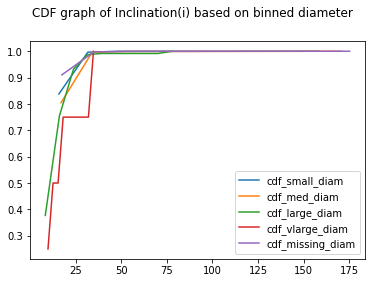

In [ ]:
cnt,bi_ed=np.histogram(small['i'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(med['i'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(large['i'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(vlarge['i'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(missing['i'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

#Plotting the legend
plt.legend('size')
plt.legend(['cdf_small_diam','cdf_med_diam', 'cdf_large_diam','cdf_vlarge_diam','cdf_missing_diam'])
#Showing the graph finally
plt.suptitle("CDF graph of Inclination(i) based on binned diameter",y=1.001)
plt.show()

##### Semi-major axis(a)

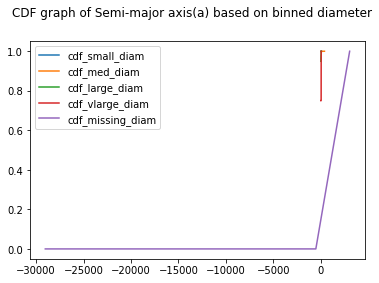

In [ ]:
cnt,bi_ed=np.histogram(small['a'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(med['a'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(large['a'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(vlarge['a'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

cnt,bi_ed=np.histogram(missing['a'],bins=10,density=True)
pdf=cnt/(sum(cnt))
#print(pdf)
#print(bi_ed)
cdf=np.cumsum(pdf)
#print(cdf)
plt.plot(bi_ed[1:],cdf)

#Plotting the legend
plt.legend('size')
plt.legend(['cdf_small_diam','cdf_med_diam', 'cdf_large_diam','cdf_vlarge_diam','cdf_missing_diam'])
#Showing the graph finally
plt.suptitle("CDF graph of Semi-major axis(a) based on binned diameter",y=1.001)
plt.show()

#### Inference:
* After Looking at the cdf plots of all features based on binned diameter, It can be observed that Absolute Magnitude(H) is very helpful in determining the diameter classes.
* For Very Larger Diameters, H is always less than 5.
* For Larger Diameters, H is greater than or equal to 5 and less than 10.
* For Medium Diameters, H is greater than or equal to 8 and less than 15. Altough there are some diameters whose H is lying around 9 to 10.
* For Smaller Diameters, H is always greater than 10.

### Building Line Plots for outlier detection

#### Semi-major axis(a)

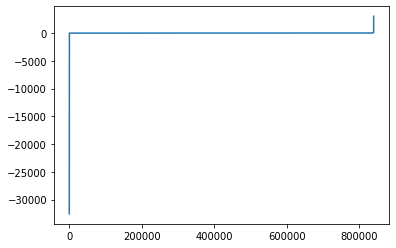

In [ ]:
sb.lineplot(data=sorted(df["a"]))

In [58]:
np.percentile(df['a'],np.arange(0,110,10))

array([-3.25889430e+04,  2.25103929e+00,  2.34621616e+00,  2.42808842e+00,
        2.57405480e+00,  2.64421911e+00,  2.73000240e+00,  2.86796477e+00,
        3.05818647e+00,  3.14434688e+00,  3.04314907e+03])

### Obervations:
1. Inflection point is observed at 0th Index and 800,000th Index(Sorted Index).
2. The domain is mostly around (0,4).
3. Before reaching 10th percentile, it can be observed that the feature has low end outliers
4. After reaching 100th percentile, inflection point is observed and high end outliers are also seen. 

#### Perihelion Distance(q)

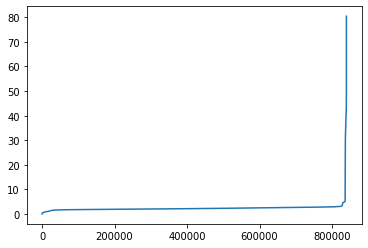

In [ ]:
sb.lineplot(data=sorted(df["q"]))

In [59]:
np.percentile(df['q'],np.arange(0,110,10))

array([7.05107320e-02, 1.79754186e+00, 1.92298442e+00, 2.01960301e+00,
       2.11448530e+00, 2.22549400e+00, 2.35816187e+00, 2.50706164e+00,
       2.64940186e+00, 2.81857931e+00, 8.04241748e+01])

### Obervations:
1. Inflection point deviates after 800,000th Index(Sorted Index).
2. The domain is mostly around (0,3).
3. After reaching 100th percentile, inflection point is observed and high end outliers are also seen.

#### Eccentricity(e)

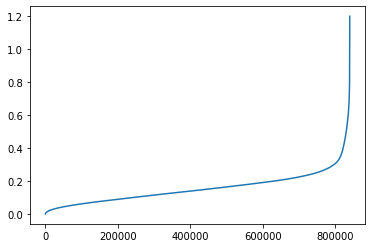

In [ ]:
sb.lineplot(data=sorted(df["e"]))

In [60]:
np.percentile(df['e'],np.arange(0,110,10))

array([0.        , 0.05597183, 0.08054497, 0.10226295, 0.12350129,
       0.1436543 , 0.16496037, 0.18742539, 0.21330236, 0.2558478 ,
       1.2011338 ])

### Obervations:
1. Inflection point deviates after 800,000th Index(Sorted Index).
2. The domain is mostly around (0,0.26).
3. After reaching 100th percentile, inflection point is observed and high end outliers are also seen.

#### Aphelion Distance(ad)

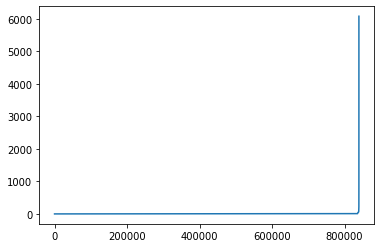

In [ ]:
sb.lineplot(data=sorted(df["ad"]))

In [61]:
np.percentile(df['ad'],np.arange(0,110,10))

array([7.73683609e-01, 2.55979938e+00, 2.71589253e+00, 2.82784649e+00,
       2.92608856e+00, 3.03774510e+00, 3.16155410e+00, 3.29055777e+00,
       3.43586509e+00, 3.66653038e+00, 6.08184196e+03])

### Obervations:
1. Inflection point deviates after 800,000th Index(Sorted Index).
2. The domain is mostly around (0,4).
3. After reaching 100th percentile, inflection point is observed and high end outliers are also seen.

#### No of Radar Observations used

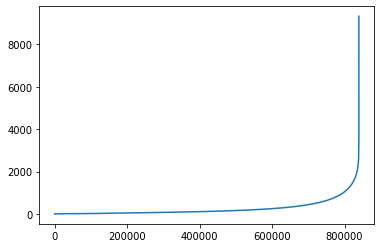

In [ ]:
sb.lineplot(data=sorted(df["n_obs_used"]))

In [63]:
np.percentile(df['n_obs_used'],np.arange(0,110,10))

array([2.000e+00, 1.800e+01, 3.900e+01, 6.100e+01, 8.600e+01, 1.180e+02,
       1.640e+02, 2.370e+02, 3.690e+02, 6.640e+02, 9.325e+03])

### Obervations:
1. Inflection point deviates after 800,000th Index(Sorted Index).
2. The domain is mostly around [0,664].
3. After reaching 100th percentile, inflection point is observed and high end outliers are also seen.

#### Absolute Magnitude(H)

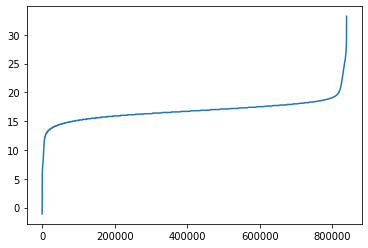

In [ ]:
sb.lineplot(data=sorted(df["H"]))

In [64]:
np.percentile(df['H'],np.arange(0,110,10))

array([-1.1, 15. , 15.7, 16.1, 16.5, 16.8, 17.1, 17.4, 17.8, 18.4, 33.2])

### Obervations:
1. Inflection point is observed at 0th Index and 800,000th Index(Sorted Index).
2. The domain is mostly around [15,19).
3. Before reaching 10th percentile, it can be observed that the feature has low end outliers
4. After reaching 100th percentile, inflection point is observed and high end outliers are also seen.

#### Geometric Albedo(albedo)

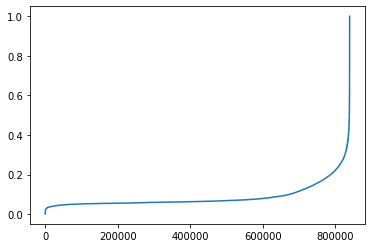

In [ ]:
sb.lineplot(data=sorted(df["albedo"]))

In [65]:
np.percentile(df['albedo'],np.arange(0,110,10))

array([0.001, 0.078, 0.078, 0.078, 0.078, 0.078, 0.078, 0.078, 0.078,
       0.078, 1.   ])

### Obervations:
1. Inflection point deviates after 800,000th Index(Sorted Index).
2. The domain is mostly around (0,0.08).
3. After reaching 100th percentile, inflection point is observed and high end outliers are also seen. 

#### Minimum Orbit Intersection Distance(moid)

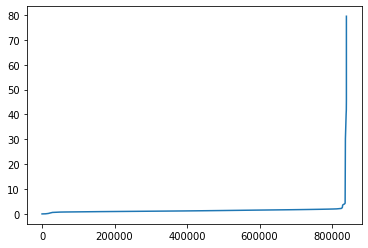

In [ ]:
sb.lineplot(data=sorted(df["moid"]))

In [66]:
np.percentile(df['moid'],np.arange(0,110,10))

array([3.437640e-07, 8.123515e-01, 9.302000e-01, 1.028780e+00,
       1.125450e+00, 1.239180e+00, 1.374020e+00, 1.522140e+00,
       1.659850e+00, 1.831630e+00, 7.950130e+01])

### Obervations:
1. Inflection point deviates after 800,000th Index(Sorted Index).
2. The domain is mostly around (0,2).
3. After reaching 100th percentile, inflection point is observed and high end outliers are also seen.

#### Orbital Period(per_y) 

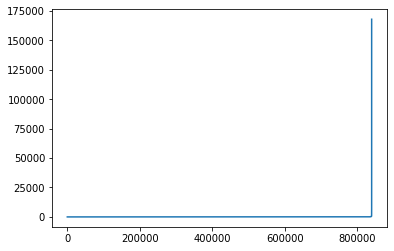

In [ ]:
sb.lineplot(data=sorted(df["per_y"]))

In [67]:
np.percentile(df['per_y'],np.arange(0,110,10))

array([0.00000000e+00, 3.37740136e+00, 3.59384835e+00, 3.78359670e+00,
       4.12985366e+00, 4.29986001e+00, 4.51079143e+00, 4.85700913e+00,
       5.34815699e+00, 5.57575751e+00, 1.67877713e+05])

### Obervations:
1. Inflection point deviates after 800,000th Index(Sorted Index).
2. The domain is mostly around (0,6).
4. After reaching 100th percentile, inflection point is observed and high end outliers are also seen. 

#### Observation Arc(data_arc)

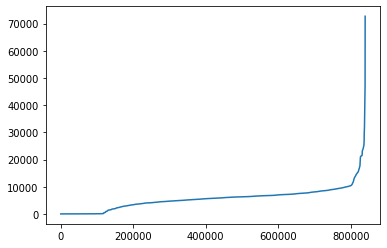

In [ ]:
sb.lineplot(data=sorted(df["data_arc"]))

In [68]:
np.percentile(df['data_arc'],np.arange(0,110,10))

array([0.0000e+00, 3.2000e+01, 2.6410e+03, 4.1400e+03, 4.9900e+03,
       5.7360e+03, 6.3080e+03, 6.8320e+03, 7.6540e+03, 9.1050e+03,
       7.2684e+04])

### Obervations:
1. A slight inflection is observed at 0th Index and higher Inflection is observed after 800,000th Index(Sorted Index).
2. The domain is mostly around (0,10k).
3. After reaching 100th percentile, inflection point is observed and high end outliers are also seen. 

In [ ]:
df.to_csv("Cleaned_Asteroid.csv",index=False)